# Improve Farming profitability

Import all essential python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Concatenate, Reshape, Dropout, Conv1D, MaxPool1D, Flatten, GlobalAveragePooling1D, multiply
from tensorflow.keras.layers import Embedding

Read the csv file using pandas

In [0]:
data = pd.read_csv("dataset.csv")

Observe the data using data.info() and data.describe(). This gives a high level overview of the dataframe in terms of the column types, missing values and basic descriptive stats about the features

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
id                  1000 non-null int64
water               958 non-null float64
uv                  949 non-null float64
area                1000 non-null float64
fertilizer_usage    1000 non-null int64
yield               1000 non-null float64
pesticides          1000 non-null float64
region              1000 non-null int64
categories          1000 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 70.4+ KB


In [4]:
data.describe()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,958.000000,949.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,499.500000,12.223546,73.957488,8.098848,2.12300,58.758571,3.452301,3.039000
std,288.819436,172.335566,9.904063,2.692632,1.52256,24.563683,2.076921,1.883886
min,0.000000,0.072000,45.264000,0.263000,0.00000,2.843000,0.014000,0.000000
25%,249.750000,4.584750,66.502000,6.297000,1.00000,40.698000,1.804500,2.000000
50%,499.500000,6.476000,73.689000,7.987500,2.00000,55.602500,3.275500,2.000000
75%,749.250000,8.758750,80.554000,9.900250,3.00000,73.645500,4.916000,5.000000
max,999.000000,5340.000000,106.310000,18.311000,5.00000,148.845000,9.532000,6.000000


# Exploratory data analysis

Create a class to perform basic exploratory data analysis of different features, that will help us visualize the distribution of differnt features

In [0]:

class EDA:
    
    def __init__(self,data):
        self.data = data
        self.columns = ['water', 'uv', 'area', 'fertilizer_usage', 'yield', 'pesticides',
       'region', 'categories']
        self.num_columns = ['water', 'uv', 'area', 'yield', 'pesticides']
        self.cat_columns = ['fertilizer_usage', 'region', 'categories']
        
    def null_data(self):
        return self.data.isnull().sum()
    
    def scatter_plot(self, target_column):
        plot_no =1
        plot_size = round(len(self.columns)/2+0.5)
        plt.figure(figsize=(30,30))
        for column in self.columns:
            plt.subplot(plot_size,2, plot_no)
            plt.title(column, fontsize=20)
            plt.scatter(self.data[target_column], self.data[column])
            plot_no = plot_no +1
            
    def box_plot(self):
        plot_no =1
        plot_size = round(len(self.num_columns)/2+0.5)
        #plt.figure(figsize=(30,50))
        for column in self.num_columns:
            plt.figure(figsize=(20,20))
            plt.subplot(plot_size,2, plot_no)
            #plt.title(column, fontsize=10)
            self.data[[column]].boxplot()
            plot_no = plot_no +1
            
    def density_plot(self):
        plot_no =1
        plot_size = round(len(self.num_columns)/2+0.5)
        plt.figure(figsize=(30,30))
        for column in self.num_columns:
            plt.figure(figsize=(20,20))
            plt.subplot(plot_size,2, plot_no)
            plt.title(column, fontsize=10)
            self.data[column].plot.kde()
            plot_no = plot_no +1
            
    def correlation(self):
        corr = self.data[self.num_columns].corr()
        return corr.style.background_gradient(cmap='coolwarm')
    
    def unique_categories(self):
        for column in self.cat_columns:
            print(column, ": ",data[column].unique())
        
        
                      

Create an object of class EDA to perform exploratory data analysis

In [6]:
exploratory_analysis = EDA(data)
exploratory_analysis.null_data()

id                   0
water               42
uv                  51
area                 0
fertilizer_usage     0
yield                0
pesticides           0
region               0
categories           0
dtype: int64

This shows the total number of null values for each feature. This will be processed further in preprocessing stage

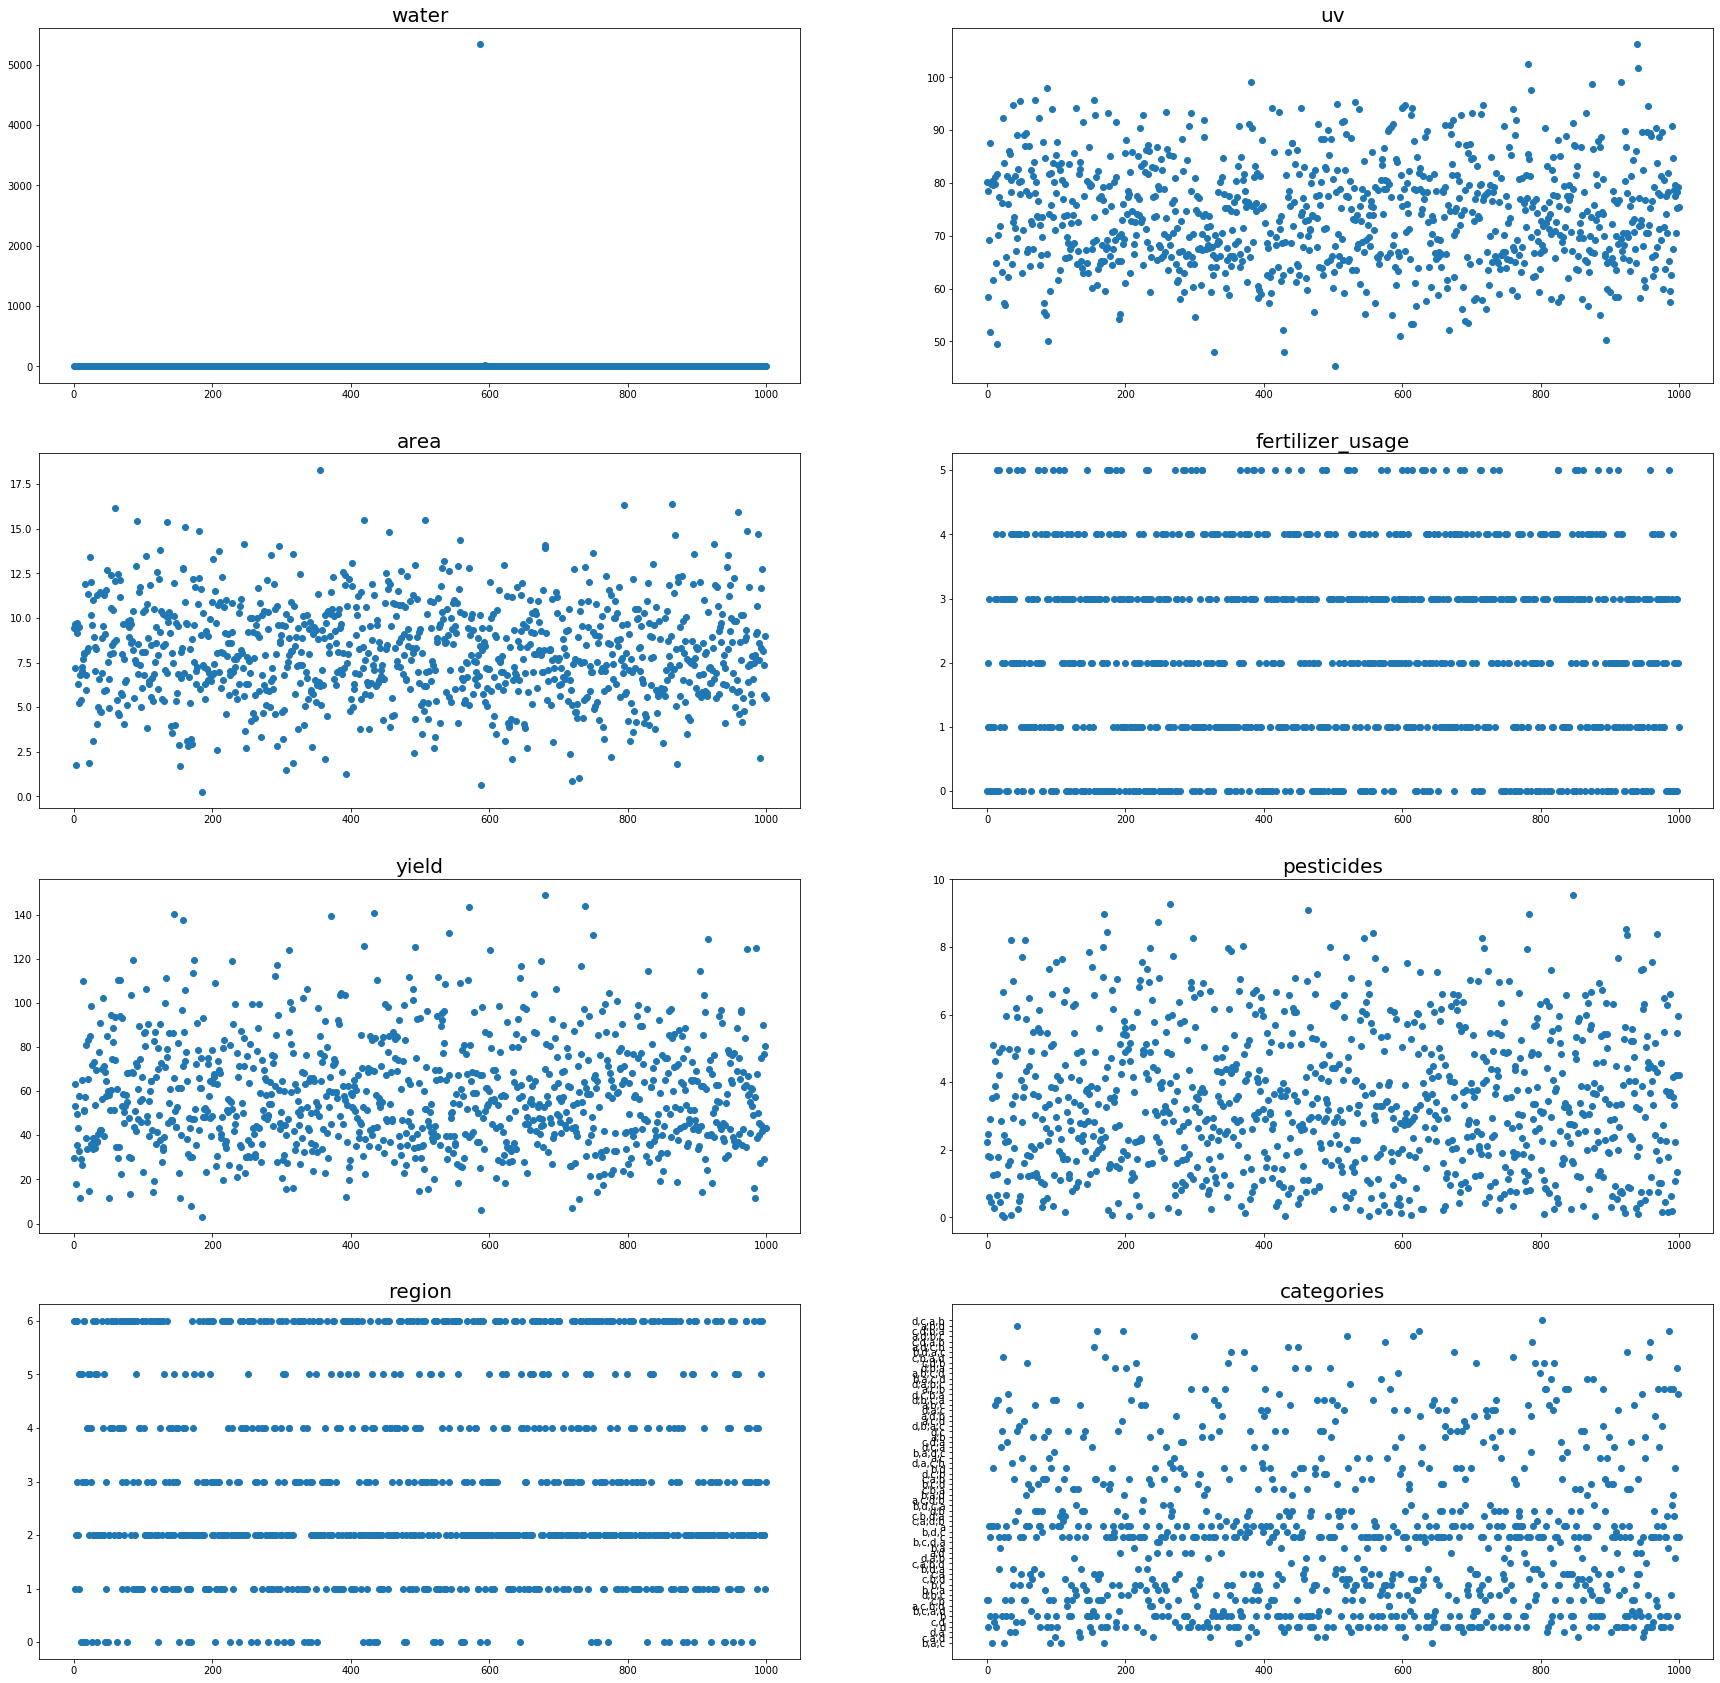

In [7]:
#Choose a specific target column to get the desired scatter plot. "id" has been chosen here to see the overall distribution of features
exploratory_analysis.scatter_plot("id")

The scatter plot shows that "water" feature has at least one outlier and "region" and "fertilizer_usage" are categorical features

Create another scatter plot with target column as "area" to see how each featue varies with respect to area

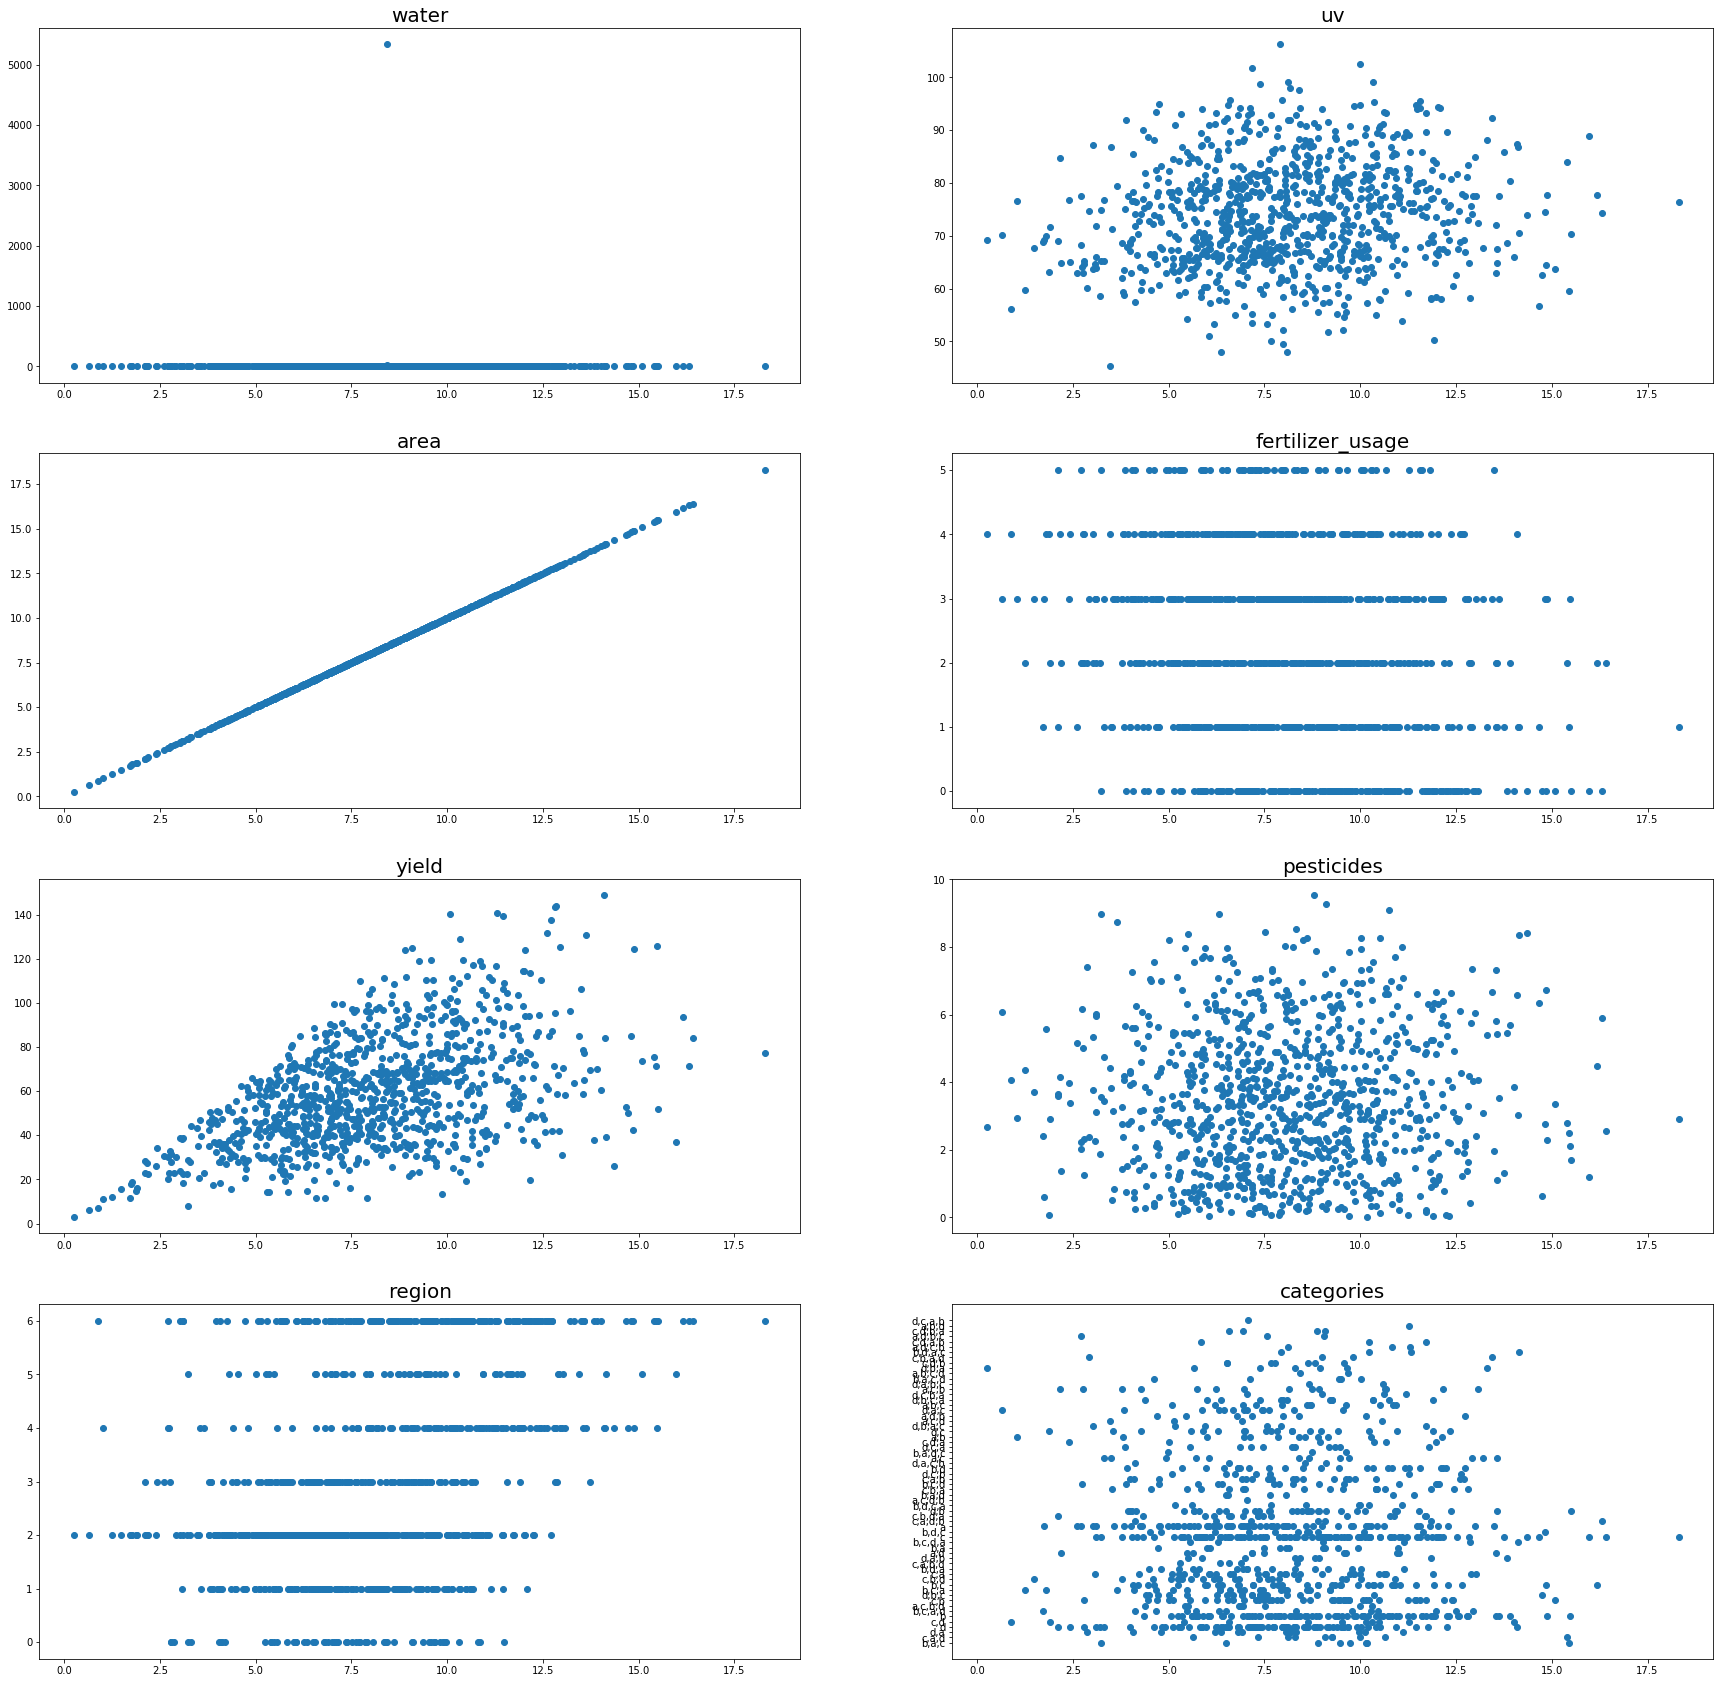

In [8]:
exploratory_analysis.scatter_plot("area")

It shows that the total yield depends on the area. We will normalize the yield and use yield per area (yield_rate) as our target variable for modeling later on

Draw a box plot for all the numeric features

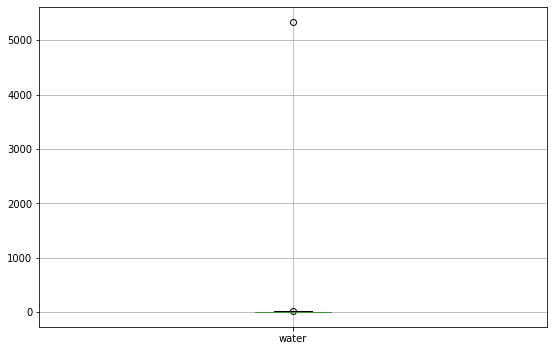

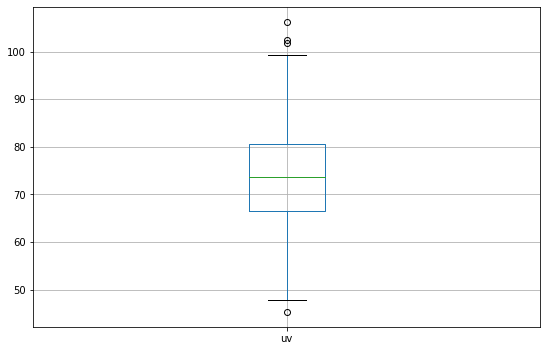

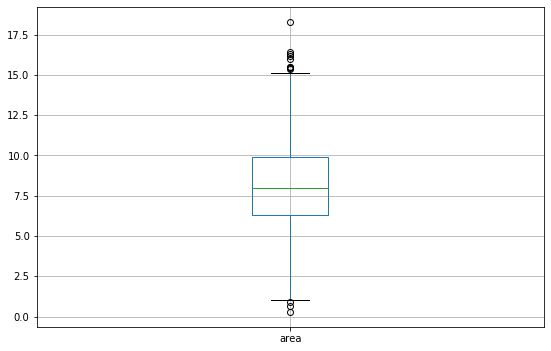

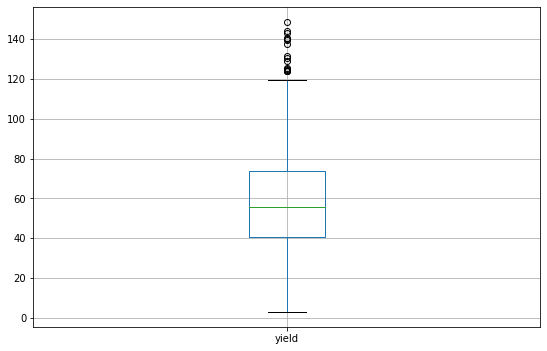

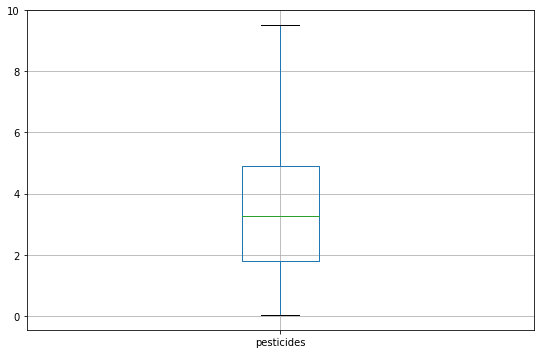

In [9]:
exploratory_analysis.box_plot()

Presence of an outlier squuezes the box plot for "water" feature

Now let us see the density plot for each of the numeric features.

<Figure size 2160x2160 with 0 Axes>

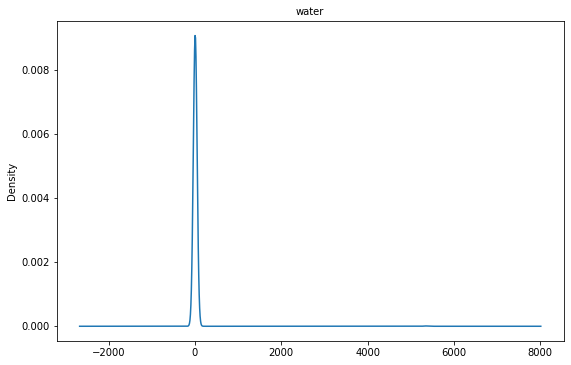

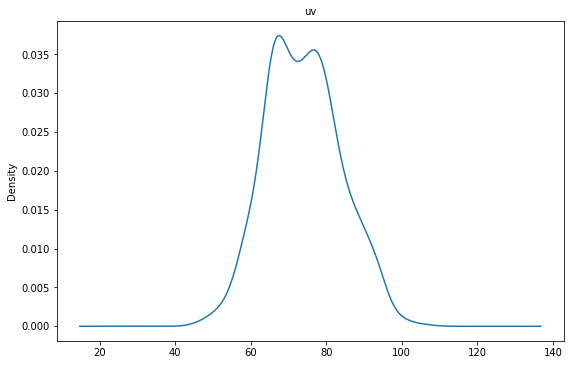

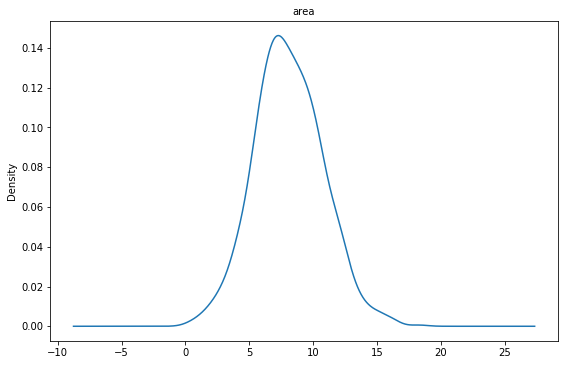

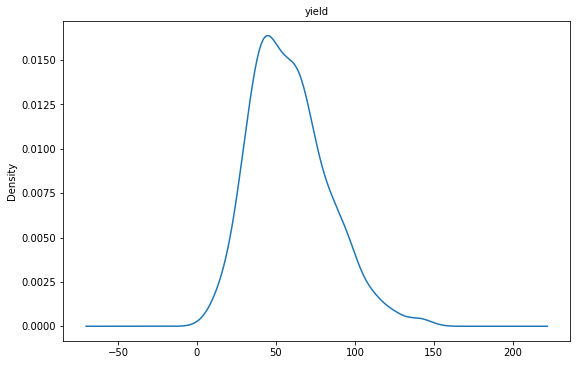

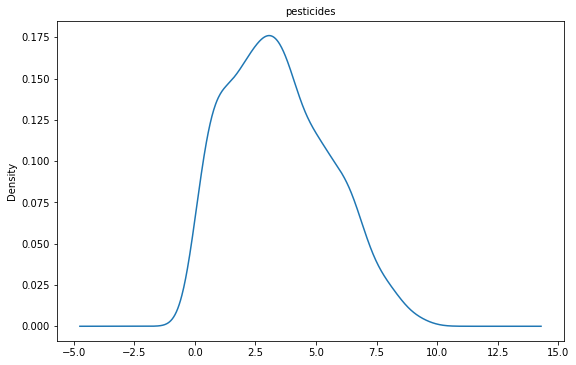

In [10]:
exploratory_analysis.density_plot()

Plot a correlation matrix across all the numeric features

In [11]:
exploratory_analysis.correlation()

,water,uv,area,yield,pesticides
water,1,0.0571646,0.000930505,0.0152538,-0.00833693
uv,0.0571646,1,0.12136,0.054515,0.00591222
area,0.000930505,0.12136,1,0.49122,0.0363022
yield,0.0152538,0.054515,0.49122,1,0.0483797
pesticides,-0.00833693,0.00591222,0.0363022,0.0483797,1


The correlation matrix shows that the total yield has high correlation with area. Also area and UV per hecter are also correlated to an extent 

Finally let us see all the unique categories for the categorical features

In [12]:
exploratory_analysis.unique_categories()

fertilizer_usage :  [0 2 1 4 3 5]
region :  [0 1 2 3 4 5 6]
categories :  ['b,a,c' 'c,a,d' 'd,a' 'd' 'c,d' 'b' 'b,c,a,d' 'a,c,b,d' 'c,b' 'd,b,c'
 'b,c,a' 'b,c' 'c,b,d' 'c,a' 'b,d,a' 'c,a,b,d' 'd,a,b' 'a,d' 'b,a'
 'b,c,d,a' 'c' 'b,d,c' 'a' 'c,a,d,b' 'c,b,d,a' 'd,b' 'b,d,c,a' 'a,c,d,b'
 'b,a,d' 'c,b,a' 'b,c,d' 'c,a,b' 'd,c,b' 'b,d' 'd,a,c,b' 'a,c' 'b,a,d,c'
 'd,c,a' 'c,d,a' 'a,b' 'd,c' 'd,b,a,c' 'a,c,d' 'a,d,b' 'd,a,c' 'a,b,c'
 'd,b,c,a' 'd,c,b,a' 'a,c,b' 'd,a,b,c' 'b,a,c,d' 'a,b,c,d' 'd,b,a' 'c,d,b'
 'c,b,a,d' 'b,d,a,c' 'a,d,c,b' 'c,d,a,b' 'a,d,b,c' 'c,d,b,a' 'a,b,d'
 'd,c,a,b']


Fertilizer usage and region has 6 and 7 classes respectively.
The pesticides category has lists of several pesticides and differnt order. It is assumed that there is no "sequential" application of pesticides and its just a collection of pesticides. It is required to normalize this to get the unique list of pesticides applied. This has been performed in the preprocessing step

# Preprocess

Create a preprocess class to perform feature engineering. This includes the following step and based on the observation from EDA

Step1: Introduce the target variable yield rate which is the total yield divided by the area. The idea is to maximize yield rate to increase profitability for the farm.

Step2: Replace the outlier present in "water" feature with null value. The outlier is identified by comapring the feature values with mean and std of "water" feature. The outlier value is more than mean+std and would be replaced with nan. Other complex approaches using LOF(local outlier factor), OneClassSVM, GESD can be employed if presence of outliers significantly impacts the model outcome.

Step3: Create a static method called transform_pesticide_categories to normalize the pesticide categories so that a,b,c and b,a,c will mean the same thing for category. The categories are converted to a list which is sorted and then its concatenated to form a string. 

Step4: Use label encoder to create labels for categories and store it in a new column called categories_label. This feature would be used to train a model to impute missing values.

Step5: Extratreeregressor has been used to impute all missing values and this takes all the numeric and encoded columns as feature. Other methods that can be used for missing value imputations are KNNimputaion and Bayseianridge regressors.

In [0]:
class preprocess:
    def __init__(self,data):
        self.data = data
        self.columns = ['water', 'uv', 'area', 'yield','region', 'pesticides', 'fertilizer_usage', "categories_label"]
    def yield_rate(self, data):
        self.data["yield_rate"] = self.data["yield"]/self.data["area"]
        return self.data
    def outlier_replace(self, data):
        mean_value = self.data["water"].mean()
        std_value = self.data["water"].std()
        self.data["water"] = self.data['water'].apply(lambda x : x if x < mean_value +std_value else np.nan )
        return self.data
    
    @staticmethod
    def transform_pesticide_categories(row):
        pest_list = row["categories"].split(",")
        pest_list = sorted(pest_list)
        pest_string = "".join(pest_list)
        return pest_string
    
    def categories_label(self, data):
        self.data["categories_label"]= LabelEncoder().fit_transform(self.data["categories"])
        return self.data
    
    def impute_missing(self, data):
        imp = IterativeImputer(max_iter=10, estimator = ExtraTreesRegressor(n_estimators=50, random_state=0))
        self.data[self.columns] =imp.fit_transform(self.data[self.columns])
        return self.data
          

Create a preprocess object and perform step by step preprocessing as described above

In [14]:
preprocess_obj = preprocess(data)
data = preprocess_obj.yield_rate(data)
data = preprocess_obj.outlier_replace(data)
data['categories'] = data.apply(preprocess.transform_pesticide_categories, axis =1)
data = preprocess_obj.categories_label(data)
data = preprocess_obj.impute_missing(data)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Let us perform further exploratory data analysis on the new dataframe.

In [15]:
exploratory_analysis = EDA(data)
exploratory_analysis.null_data()

id                  0
water               0
uv                  0
area                0
fertilizer_usage    0
yield               0
pesticides          0
region              0
categories          0
yield_rate          0
categories_label    0
dtype: int64

There are no null values present in the data

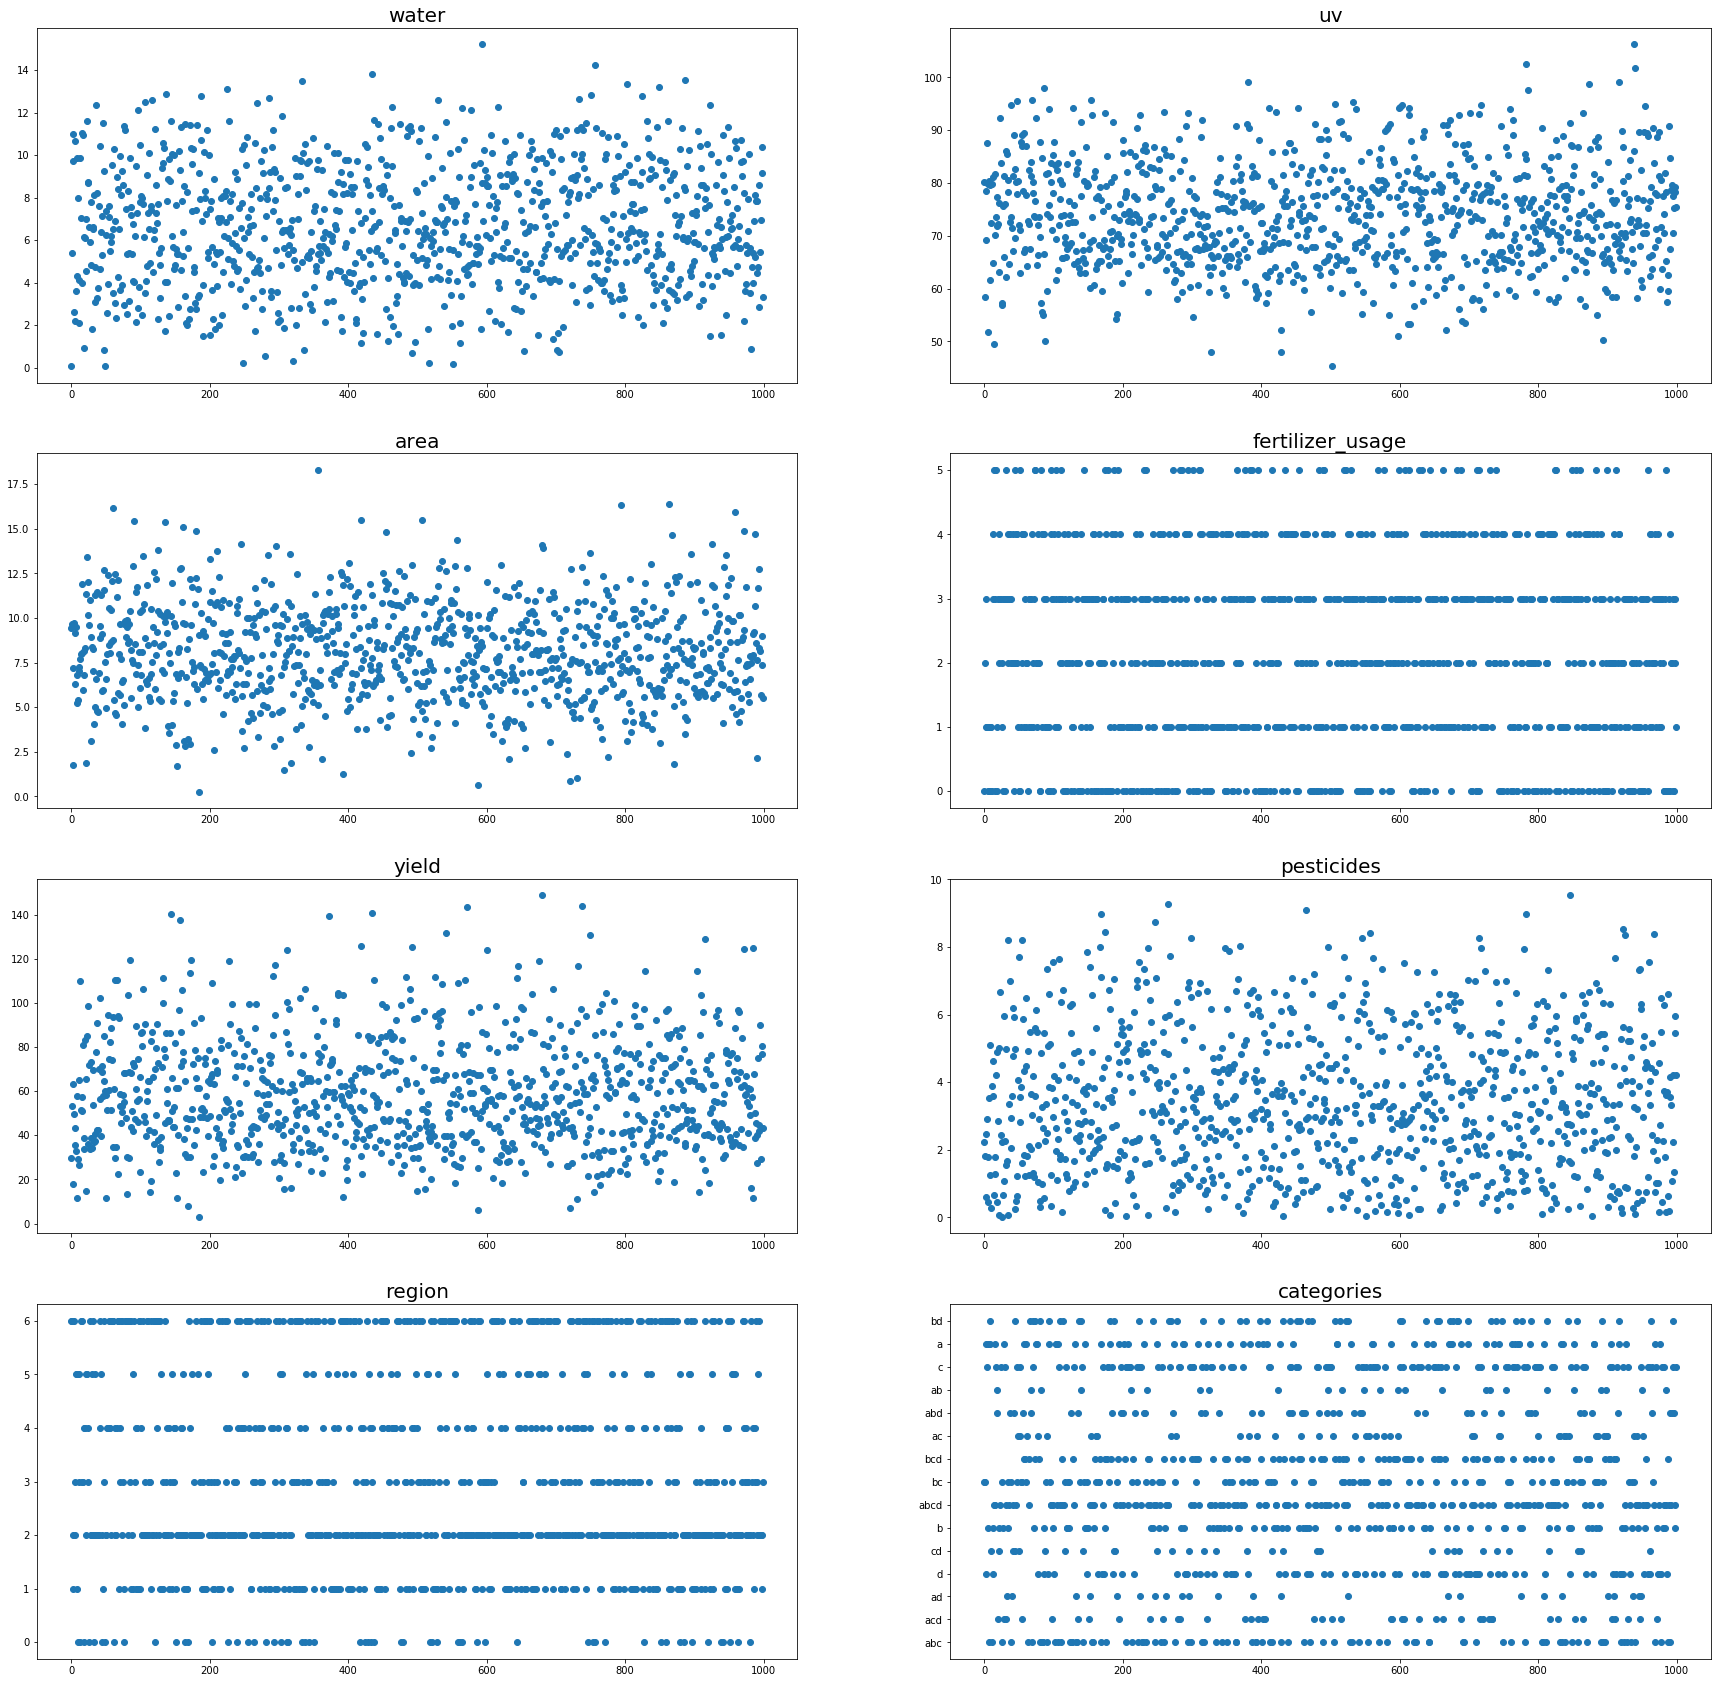

In [16]:
exploratory_analysis.scatter_plot('id')

It is clear from the scatter plot that there are no outliers present in "water" feature.

Let us see the density plot for the preprocessed features

<Figure size 2160x2160 with 0 Axes>

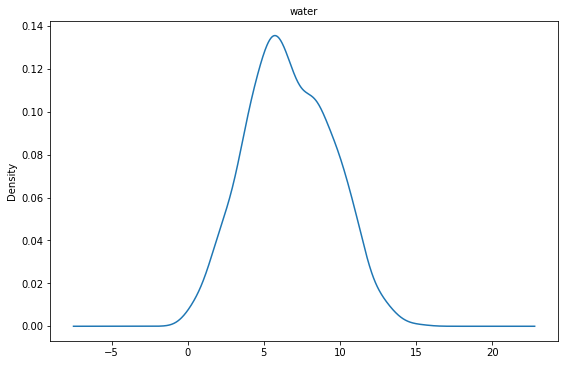

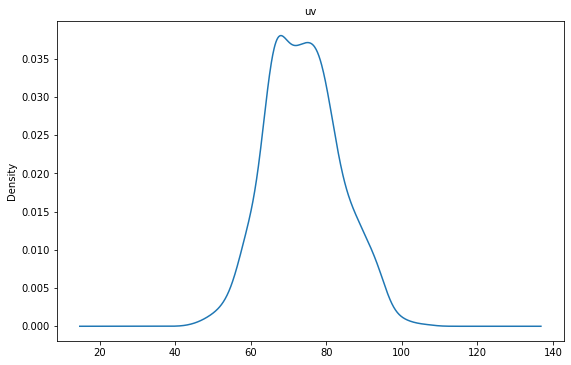

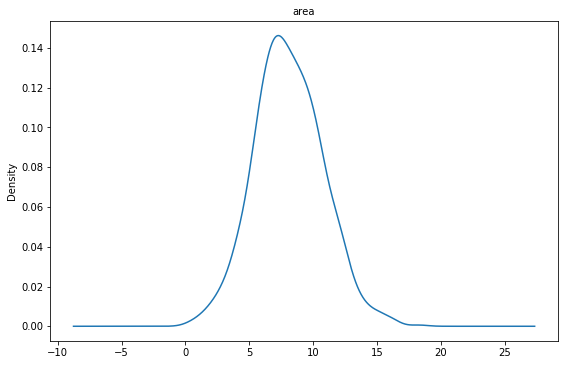

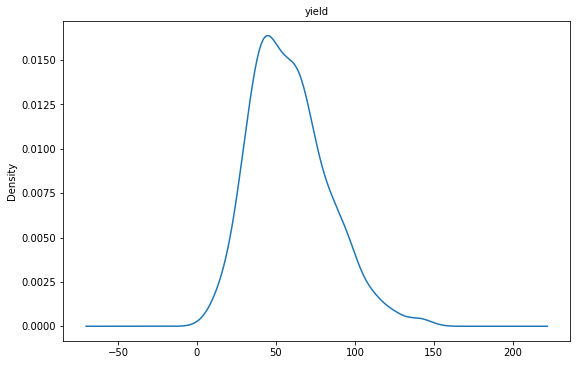

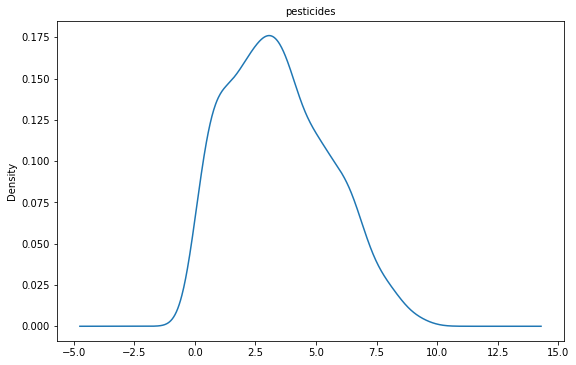

In [17]:
exploratory_analysis.density_plot()

In [18]:
exploratory_analysis.unique_categories()

fertilizer_usage :  [0. 2. 1. 4. 3. 5.]
region :  [0. 1. 2. 3. 4. 5. 6.]
categories :  ['abc' 'acd' 'ad' 'd' 'cd' 'b' 'abcd' 'bc' 'bcd' 'ac' 'abd' 'ab' 'c' 'a'
 'bd']


The categories for pesticides is now reduced to 15 unique values.

# Model

Define a Model class that is initialized by taking the dataframe, numerical and categorical features as parameters.
yield_rate has been chosen as the target variable. The number of splits for cross validation is initialized to 5. Train test split is performed on a ratio of 80/20. Top features that needs to be displayed is set to 10.

Create two pipeline models each of GradientboostedRegressor and RandomforestRegressor. Define parameter grid for each model. Create a column transformer object that applied transormation like normalization to numeric features and one hot encoding to categorical features. The scoring metric is defined as "neg_mean_absolute_error".

Both the models are trained using GridSearchCV across parameters and 5 fold cross validation separately.
Best model is selected by comparing the best estimator from both the models using best_score.

Mean absolute precentage error is obtained for the test set to see the performance of the final model.

A feature importance dataframe is created with features arranged in their sorted values of importance score and top 10 features are displayed.


In [0]:
class Model:
    def __init__(self,data, numerical_columns, categorical_columns):
        self.data = data
        self.numerical_columns = numerical_columns
        self.categorical_columns = categorical_columns
        self.cv = 5
        self.X = self.data[self.categorical_columns + self.numerical_columns]
        self.y = self.data["yield_rate"]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y,test_size=0.20, random_state=42)
        self.top_features = 10
        
    def gb_model(self):
        params = {'n_estimators': [200,300,500], 'max_depth': [5,10,15], 'min_samples_split': [2],
          'learning_rate': [0.01,0.001,0.1], 'loss': ['ls']}

        categorical_pipe = Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])
        numerical_pipe = Pipeline([
            ('StandardScaler', StandardScaler())
        ])

        preprocessing = ColumnTransformer(
            [('cat', categorical_pipe, self.categorical_columns),
             ('num', numerical_pipe, self.numerical_columns)])

        clf = Pipeline([
            ('preprocess', preprocessing),
            ('regressor', GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=params,cv =self.cv, scoring='neg_mean_absolute_error'))
        ])
        clf.fit(self.X_train,self.y_train)
        return clf
    
    def rf_model(self):
        params = {'n_estimators': [200,300,500], 'max_depth': [5,10,15], 'min_samples_split': [2]}

        categorical_pipe = Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])
        numerical_pipe = Pipeline([
            ('StandardScaler', StandardScaler())
        ])

        preprocessing = ColumnTransformer(
            [('cat', categorical_pipe, self.categorical_columns),
             ('num', numerical_pipe, self.numerical_columns)])

        clf = Pipeline([
            ('preprocess', preprocessing),
            ('regressor', GridSearchCV(RandomForestRegressor(random_state=42), param_grid=params,cv =self.cv, scoring='neg_mean_absolute_error'))
        ])
        clf.fit(self.X_train,self.y_train)
        return clf
    
    def best_model(self, model1, model2):
        if model1['regressor'].best_score_ > model2['regressor'].best_score_:
            print("GradientboostedRegressor performs best")
            return model1
        else:
            print("RandomForestRegressor performs best")
            return model2        
    
    def score(self, output):
        score = output['regressor'].best_score_
        print("Cross validated mean absolute error: ", score)
    
    def mean_absolute_percentage_error(self, model): 
        score = np.mean(np.abs((self.y_test - model.predict(self.X_test)) / self.y_test)) * 100
        print("Mean absolute percentage error on test set: ",score)
    
    def feature_importance(self, output): 
        cat_features= output.named_steps['preprocess'].transformers_[0][1].named_steps['onehot'].get_feature_names(self.categorical_columns)
        num_features = output.named_steps['preprocess'].transformers_[1][2]
        features = list(cat_features)+num_features
        feature_importances = output["regressor"].best_estimator_.feature_importances_
        print("\nFeatures sorted by their score for the best estimator: ")
        feature_importances = pd.DataFrame(feature_importances,
                                           index = features,
                                            columns=['importance']).sort_values('importance', ascending=False)
        print(feature_importances.iloc[:self.top_features])
        
        

# Region agnostic prediction Model

The following model tries to predict the yield rate by not takinng any specific region into account

In [20]:
numerical_columns = ['water', 'uv', 'pesticides']
categorical_columns = ['fertilizer_usage', 'region', 'categories']
model = Model(data, numerical_columns, categorical_columns)
model1 = model.gb_model()
model2 = model.rf_model()
best_model = model.best_model(model1,model2)
result_score = model.score(best_model)
test_score = model.mean_absolute_percentage_error(best_model)
result_feature_imp = model.feature_importance(best_model)

GradientboostedRegressor performs best
Cross validated mean absolute error:  -0.732141607143806
Mean absolute percentage error on test set:  11.108205194688011

Features sorted by their score for the best estimator: 
                      importance
fertilizer_usage_0.0    0.245101
pesticides              0.179317
water                   0.159549
region_6.0              0.128902
fertilizer_usage_1.0    0.078587
region_5.0              0.051912
fertilizer_usage_5.0    0.036496
fertilizer_usage_2.0    0.029201
fertilizer_usage_4.0    0.028565
uv                      0.023300


The results show that, fertilizer 0 has the highest influence on yield rate along with pesticides and water applicaiton per hecter.
Region 6 and region 5 have overall higher yield rate than other regions.

# Region Specific Models

Train a model specific to each region to estimate the important features that will lead to maximum yield per hecter. Please note that we wont take region as a categorical feature for the models. The data will be filtered for each region and model needs to be trained to obtain the top important features.

In [37]:
numerical_columns = ['water', 'uv', 'pesticides']
categorical_columns = ['fertilizer_usage','categories']
data_0 = data[data["region"]==0]
model = Model(data_0, numerical_columns, categorical_columns)
model1 = model.gb_model()
model2 = model.rf_model()
best_model = model.best_model(model1,model2)
result_score = model.score(best_model)
test_score = model.mean_absolute_percentage_error(best_model)
result_feature_imp = model.feature_importance(best_model)

RandomForestRegressor performs best
Cross validated mean absolute error:  -1.4520781364765436
Mean absolute percentage error on test set:  27.255325004355274

Features sorted by their score for the best estimator: 
                      importance
water                   0.345081
fertilizer_usage_0.0    0.221303
pesticides              0.126944
fertilizer_usage_4.0    0.080893
uv                      0.051767
categories_abcd         0.033211
fertilizer_usage_3.0    0.026742
fertilizer_usage_5.0    0.014314
categories_bd           0.013839
fertilizer_usage_2.0    0.013467


The model did not perform well for region 0 with high MAPE. It is observed that adquate water and fertilizer 0 will have higher yield rate for this region

In [38]:
numerical_columns = ['water', 'uv', 'pesticides']
categorical_columns = ['fertilizer_usage','categories']
data_1 = data[data["region"]==1]
model = Model(data_1, numerical_columns, categorical_columns)
model1 = model.gb_model()
model2 = model.rf_model()
best_model = model.best_model(model1,model2)
result_score = model.score(best_model)
test_score = model.mean_absolute_percentage_error(best_model)
result_feature_imp = model.feature_importance(best_model)

GradientboostedRegressor performs best
Cross validated mean absolute error:  -0.9117475425783625
Mean absolute percentage error on test set:  14.182406487288478

Features sorted by their score for the best estimator: 
                      importance
water                   0.269153
pesticides              0.173530
fertilizer_usage_4.0    0.111634
uv                      0.105516
fertilizer_usage_0.0    0.088463
fertilizer_usage_5.0    0.074344
fertilizer_usage_3.0    0.068691
fertilizer_usage_1.0    0.054939
categories_a            0.011096
categories_abcd         0.009720


The model performs fairly better for region1 and it is interesting to note that water, pesticides and fertilizer category 4 tend to produce more corp for this region

In [39]:
numerical_columns = ['water', 'uv', 'pesticides']
categorical_columns = ['fertilizer_usage','categories']
data_2 = data[data["region"]==2]
model = Model(data_2, numerical_columns, categorical_columns)
model1 = model.gb_model()
model2 = model.rf_model()
best_model = model.best_model(model1,model2)
result_score = model.score(best_model)
test_score = model.mean_absolute_percentage_error(best_model)
result_feature_imp = model.feature_importance(best_model)

GradientboostedRegressor performs best
Cross validated mean absolute error:  -0.8135256065096101
Mean absolute percentage error on test set:  14.540131520141989

Features sorted by their score for the best estimator: 
                      importance
water                   0.414143
pesticides              0.206267
fertilizer_usage_0.0    0.154815
fertilizer_usage_1.0    0.106950
uv                      0.021791
fertilizer_usage_2.0    0.021774
fertilizer_usage_5.0    0.020232
fertilizer_usage_3.0    0.019288
fertilizer_usage_4.0    0.015520
categories_ac           0.003495


For region 2, it is suggested to use more water, pesticides and fertilizer 0 to get better yield.

In [40]:
numerical_columns = ['water', 'uv', 'pesticides']
categorical_columns = ['fertilizer_usage','categories']
data_3 = data[data["region"]==3]
model = Model(data_3, numerical_columns, categorical_columns)
model1 = model.gb_model()
model2 = model.rf_model()
best_model = model.best_model(model1,model2)
result_score = model.score(best_model)
test_score = model.mean_absolute_percentage_error(best_model)
result_feature_imp = model.feature_importance(best_model)

RandomForestRegressor performs best
Cross validated mean absolute error:  -1.1099131090722099
Mean absolute percentage error on test set:  20.487343076329502

Features sorted by their score for the best estimator: 
                      importance
water                   0.307064
fertilizer_usage_0.0    0.228251
pesticides              0.191111
uv                      0.072412
fertilizer_usage_5.0    0.041166
categories_abcd         0.035802
fertilizer_usage_1.0    0.033383
fertilizer_usage_3.0    0.021823
categories_d            0.016608
fertilizer_usage_2.0    0.015049


For region 3, it is suggested to use water, fertilizer 0 and pesticides to get better yield rate

In [41]:
numerical_columns = ['water', 'uv', 'pesticides']
categorical_columns = ['fertilizer_usage','categories']
data_4 = data[data["region"]==4]
model = Model(data_4, numerical_columns, categorical_columns)
model1 = model.gb_model()
model2 = model.rf_model()
best_model = model.best_model(model1,model2)
result_score = model.score(best_model)
test_score = model.mean_absolute_percentage_error(best_model)
result_feature_imp = model.feature_importance(best_model)

GradientboostedRegressor performs best
Cross validated mean absolute error:  -1.0312125842413797
Mean absolute percentage error on test set:  18.437673265727955

Features sorted by their score for the best estimator: 
                      importance
fertilizer_usage_0.0    0.321641
fertilizer_usage_1.0    0.180829
pesticides              0.176469
water                   0.112679
fertilizer_usage_5.0    0.047868
categories_abcd         0.036359
uv                      0.035629
fertilizer_usage_2.0    0.023238
fertilizer_usage_4.0    0.013691
fertilizer_usage_3.0    0.012018


Unlike other regions, region 4 has less dependency on water and needs fertilizer 0 and 1 alongwith pesticides for a better crop yield

In [42]:
numerical_columns = ['water', 'uv', 'pesticides']
categorical_columns = ['fertilizer_usage','categories']
data_5 = data[data["region"]==5]
model = Model(data_5, numerical_columns, categorical_columns)
model1 = model.gb_model()
model2 = model.rf_model()
best_model = model.best_model(model1,model2)
result_score = model.score(best_model)
test_score = model.mean_absolute_percentage_error(best_model)
result_feature_imp = model.feature_importance(best_model)

GradientboostedRegressor performs best
Cross validated mean absolute error:  -0.9145175697741973
Mean absolute percentage error on test set:  19.475288742338513

Features sorted by their score for the best estimator: 
                      importance
water                   0.613205
fertilizer_usage_1.0    0.080646
fertilizer_usage_0.0    0.076405
pesticides              0.070317
fertilizer_usage_2.0    0.033464
uv                      0.021236
categories_bcd          0.015638
categories_abd          0.014588
categories_d            0.014262
fertilizer_usage_3.0    0.013711


region 5 has very high dependence on water to produce more crop per hecter

In [43]:
numerical_columns = ['water', 'uv', 'pesticides']
categorical_columns = ['fertilizer_usage','categories']
data_6 = data[data["region"]==6]
model = Model(data_6, numerical_columns, categorical_columns)
model1 = model.gb_model()
model2 = model.rf_model()
best_model = model.best_model(model1,model2)
result_score = model.score(best_model)
test_score = model.mean_absolute_percentage_error(best_model)
result_feature_imp = model.feature_importance(best_model)

GradientboostedRegressor performs best
Cross validated mean absolute error:  -0.5896805384597081
Mean absolute percentage error on test set:  10.06934598186506

Features sorted by their score for the best estimator: 
                      importance
fertilizer_usage_0.0    0.399595
pesticides              0.165863
fertilizer_usage_1.0    0.146329
water                   0.093892
uv                      0.063404
fertilizer_usage_2.0    0.059867
fertilizer_usage_5.0    0.018484
fertilizer_usage_3.0    0.014481
fertilizer_usage_4.0    0.013331
categories_abcd         0.004640


For region 6, fertilizers 0,1 and pesticides tend to produce better crop yield

# Recommendations

Region Agnostic Recommendation:

1. Increase applications of fertilizer 0, water and pesticides respectively to produce better yiled.
2. Increase farming in region 6 as this region produces better yield than other regions.

Region Specific Recommendations:

1. Invest in adequate water supply and application of fertilizer 0 for region 0
2. Invest in adequate water, pesticides and fertilizer 4 for region 1
3. Invest in adequate water supply and application of fertilizer 0 and fertilizer 1 for region 2
4. Invest in water supply, fertilizer 0 and aaplication of pesticides to improve the yiled rate for region 3
5. Invest in Fertilizer 0, 1 and pesticides for region 4
6. Invest in adequate water supply for region 5
7. Invest in Fertilizer 0, 1 and pesticides for region 6
Region 4 and 6 need less application of water for better crop yield, whereas Region 5 only needs adequate water supply to produce the best yield.

# Improvements

1. Better hyperparameter tuning for the models by enhancing the parameter grid
2. Inclusion of additional models and ensembling the models in pipeline, instead of choosing the best models based on cross validation score
3. Implement novel outlier/anomaly detection methods

It is recommended to use a similar neural architecture described below to further improve prediction for a larger dataset. It used embedding for categorical features and a deep convolution neural layers with squeeze and excite block on the concatenation vector from numerical and categorical features. The model should be exclusively used to predict the yield rate as it is difficult to get feature importance score from a neural model. Also performing KFold cross validation will require the model to be iterated K times over differnt samples.


In [51]:

numerical_columns = ['water', 'uv', 'pesticides']
categorical_columns = ['fertilizer_usage', 'region', 'categories']
model = Model(data, numerical_columns, categorical_columns)

from tensorflow.keras.models import Model

def input_feature_transformation(training_data, validation_data):
    input_list = [categorical_columns + [numerical_columns]]
    input_list = [item for sublist in input_list for item in sublist]
    training_data[categorical_columns] = training_data[categorical_columns].astype(str)
    validation_data[categorical_columns] = validation_data[categorical_columns].astype(str)
    master_data = pd.concat([training_data, validation_data])
    for features in categorical_columns:
        master_data[features] = LabelEncoder().fit_transform(master_data[features])
    master_data[numerical_columns] = StandardScaler().fit_transform(master_data[numerical_columns])
    training_data = master_data.iloc[:len(training_data)]
    validation_data = master_data.iloc[len(training_data):]
    training_data_new = [training_data[features].values for features in input_list]
    validation_data_new = [validation_data[features].values for features in input_list]
    return training_data_new,validation_data_new

def squeeze_excite_block(tensor, ratio=8):
    init = tensor
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, filters)

    se = GlobalAveragePooling1D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    x = multiply([init, se])
    return x

def neural_model(master_data, categorical_columns, numerical_columns):
    models = []
    inputs = []
    for categorical_var in categorical_columns:
        shape = Input(shape=(1,))
        inputs.append(shape)
        no_of_unique_cat = master_data[categorical_var].nunique()
        embedding_size = min(np.ceil((no_of_unique_cat) / 2), 20)
        embedding_size = int(embedding_size)
        vocab = no_of_unique_cat + 1
        embedding = Embedding(vocab, embedding_size, input_length=1)(shape)
        embedding = Reshape(target_shape=(embedding_size,))(embedding)
        models.append(embedding)
    input_numeric = Input(shape=(len(numerical_columns),))
    embedding_numeric = Dense(200)(input_numeric)
    inputs.append(input_numeric)
    inputs_layer = Concatenate()(inputs)
    models.append(embedding_numeric)
    z = Concatenate()(models)
    z = Reshape(target_shape =(int(z.shape[1]),1))(z)
    z = Conv1D(64, 16, padding='same', activation='relu')(z)
    z = squeeze_excite_block(z)
    z = MaxPool1D()(z)
    z = Conv1D(32, 8 , padding='same', activation='relu')(z)
    z = squeeze_excite_block(z)
    z = MaxPool1D()(z)
    z = Flatten()(z)
    z = Dense(200, activation='relu')(z)
    z = Dropout(.02)(z)
    z = Dense(100, activation='relu')(z)
    z = Dropout(.01)(z)
    z = Dense(10, activation='relu')(z)
    output = Dense(1)(z)
    model = Model(inputs, output)
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse', 'mae', 'mape'])
    return model

# Fetch the train test data from the Model class defined earlier and transform the data into desired format needed by the neural model
X_train, X_test = input_feature_transformation(model.X_train, model.X_test)
y_train = model.y_train

#batch size and epochs can be changed depending on the data volume. Early stopping can be used to seelct the best performing model
neural_model = neural_model(data, categorical_columns, numerical_columns)
neural_model.fit(X_train,y_train, epochs=40, batch_size=20, verbose=1, validation_split=0.1)

# perm = PermutationImportance(neural_model, random_state=1).fit(X_train,y_train)
# eli5.show_weights(perm, feature_names = X.columns.tolist())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Train on 720 samples, validate on 80 samples
Epoch 1/40
720/720 [==============================] - 8s 11ms/sample - loss: 7.3186 - mean_squared_error: 61.7191 - mean_absolute_error: 7.3186 - mean_absolute_percentage_error: 94.3817 - val_loss: 3.6366 - val_mean_squared_error: 19.3979 - val_mean_absolute_error: 3.6366 - val_mean_absolute_percentage_error: 47.6382
Epoch 2/40
720/720 [==============================] - 0s 392us/sample - loss: 2.7659 - mean_squared_error: 11.9754 - mean_absolute_error: 2.7659 - mean_absolute_percentage_error: 44.3554 - val_loss: 2.5259 - val_mean_squared_error: 9.8130 - val_mean_absolute_error: 2.5259 - val_mean_absolute_percentage_error: 42.8986
Epoch 3/40
720/720 [==============================] - 0s 408us/sample - loss: 2.2140 - mean_squared_error: 7.5309 - mean_absolute_error: 2.2140 - mean_absolute_percentage_error: 35.7142 - val_loss: 2.3831 - val_mean_squared_error: 8.4997 - val_mean_absolute_error: 2.3831 - val_mean_absolute_percentage_error: 44.1384

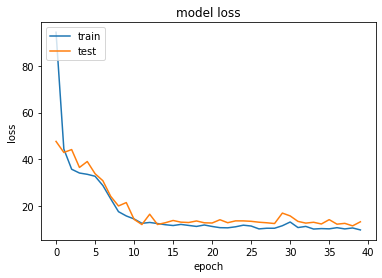

In [52]:
#plot the training and validation loss with respect to epoch
plt.plot(neural_model.history.history['mean_absolute_percentage_error'])
plt.plot(neural_model.history.history['val_mean_absolute_percentage_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Appendices

In [0]:
#########################################################################################################################

In [0]:
result_feature_imp = Model(data).feature_importance(result)

Features sorted by their score for the best estimator: 
                      importance
fertilizer_usage_0.0    0.243233
pesticides              0.178986
water                   0.156242
region_6.0              0.128447
fertilizer_usage_1.0    0.073816


In [0]:
result["regressor"].best_estimator_.feature_importances_ 

array([2.77387889e-01, 8.14872334e-02, 3.10733041e-02, 1.04922024e-02,
       2.77698110e-02, 3.78192941e-02, 1.33401537e-04, 1.07697084e-03,
       6.87200717e-04, 7.90797898e-04, 3.77063418e-04, 4.91976602e-02,
       1.39744046e-01, 4.12909040e-04, 2.65669344e-04, 7.41233277e-04,
       3.09236373e-04, 1.19483231e-04, 1.52296197e-04, 5.45536624e-05,
       0.00000000e+00, 3.60840724e-05, 4.61945102e-04, 1.23371909e-05,
       9.80039916e-05, 3.36098159e-05, 3.94228199e-04, 1.38815917e-03,
       1.65697402e-01, 7.45204978e-03, 1.64333925e-01])

In [0]:
#remove outliers and replace with np.nan
import numpy as np
mean_value = data["water"].mean()
std_value = data["water"].std()
def outlier_replace(row):
    if row["water"]>mean_value +std_value:
        return np.nan
    else:
        return row["water"]
    
data["water"] = data.apply(outlier_replace,axis =1)

In [0]:
def transform_pesticide_categories(row):
    pest_list = row["categories"].split(",")
    pest_list = sorted(pest_list)
    pest_string = "".join(pest_list)
    return pest_string

data["categories"] = data.apply(transform_pesticide_categories, axis =1)

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_test, clf.predict(X_test))

13.60912779225846

In [0]:
def feature_importance():
    

In [0]:
clf.named_steps["classifier"].feature_importances_ 

array([0.14646479, 0.07941609, 0.03261142, 0.01294104, 0.01287535,
       0.01112904, 0.00051128, 0.00090242, 0.00212172, 0.00102675,
       0.00227383, 0.02803047, 0.05766182, 0.00220607, 0.00069923,
       0.00069008, 0.00197782, 0.00137113, 0.0003419 , 0.00036022,
       0.00072755, 0.0009501 , 0.00207167, 0.00142929, 0.00286806,
       0.00393711, 0.00073659, 0.00357139, 0.09328501, 0.02874479,
       0.33312493, 0.13294104])

In [0]:
clf.named_steps['preprocess'].transformers_[0][1].named_steps['onehot'].get_feature_names(categorical_columns)

array(['fertilizer_usage_0', 'fertilizer_usage_1', 'fertilizer_usage_2',
       'fertilizer_usage_3', 'fertilizer_usage_4', 'fertilizer_usage_5',
       'region_0', 'region_1', 'region_2', 'region_3', 'region_4',
       'region_5', 'region_6', 'categories_a', 'categories_ab',
       'categories_abc', 'categories_abcd', 'categories_abd',
       'categories_ac', 'categories_acd', 'categories_ad', 'categories_b',
       'categories_bc', 'categories_bcd', 'categories_bd', 'categories_c',
       'categories_cd', 'categories_d'], dtype=object)

In [0]:
clf.named_steps['preprocess'].transformers_[1][2]
#named_steps['StandardScaler'].get_feature_names(numerical_columns)

['water', 'uv', 'area', 'pesticides']

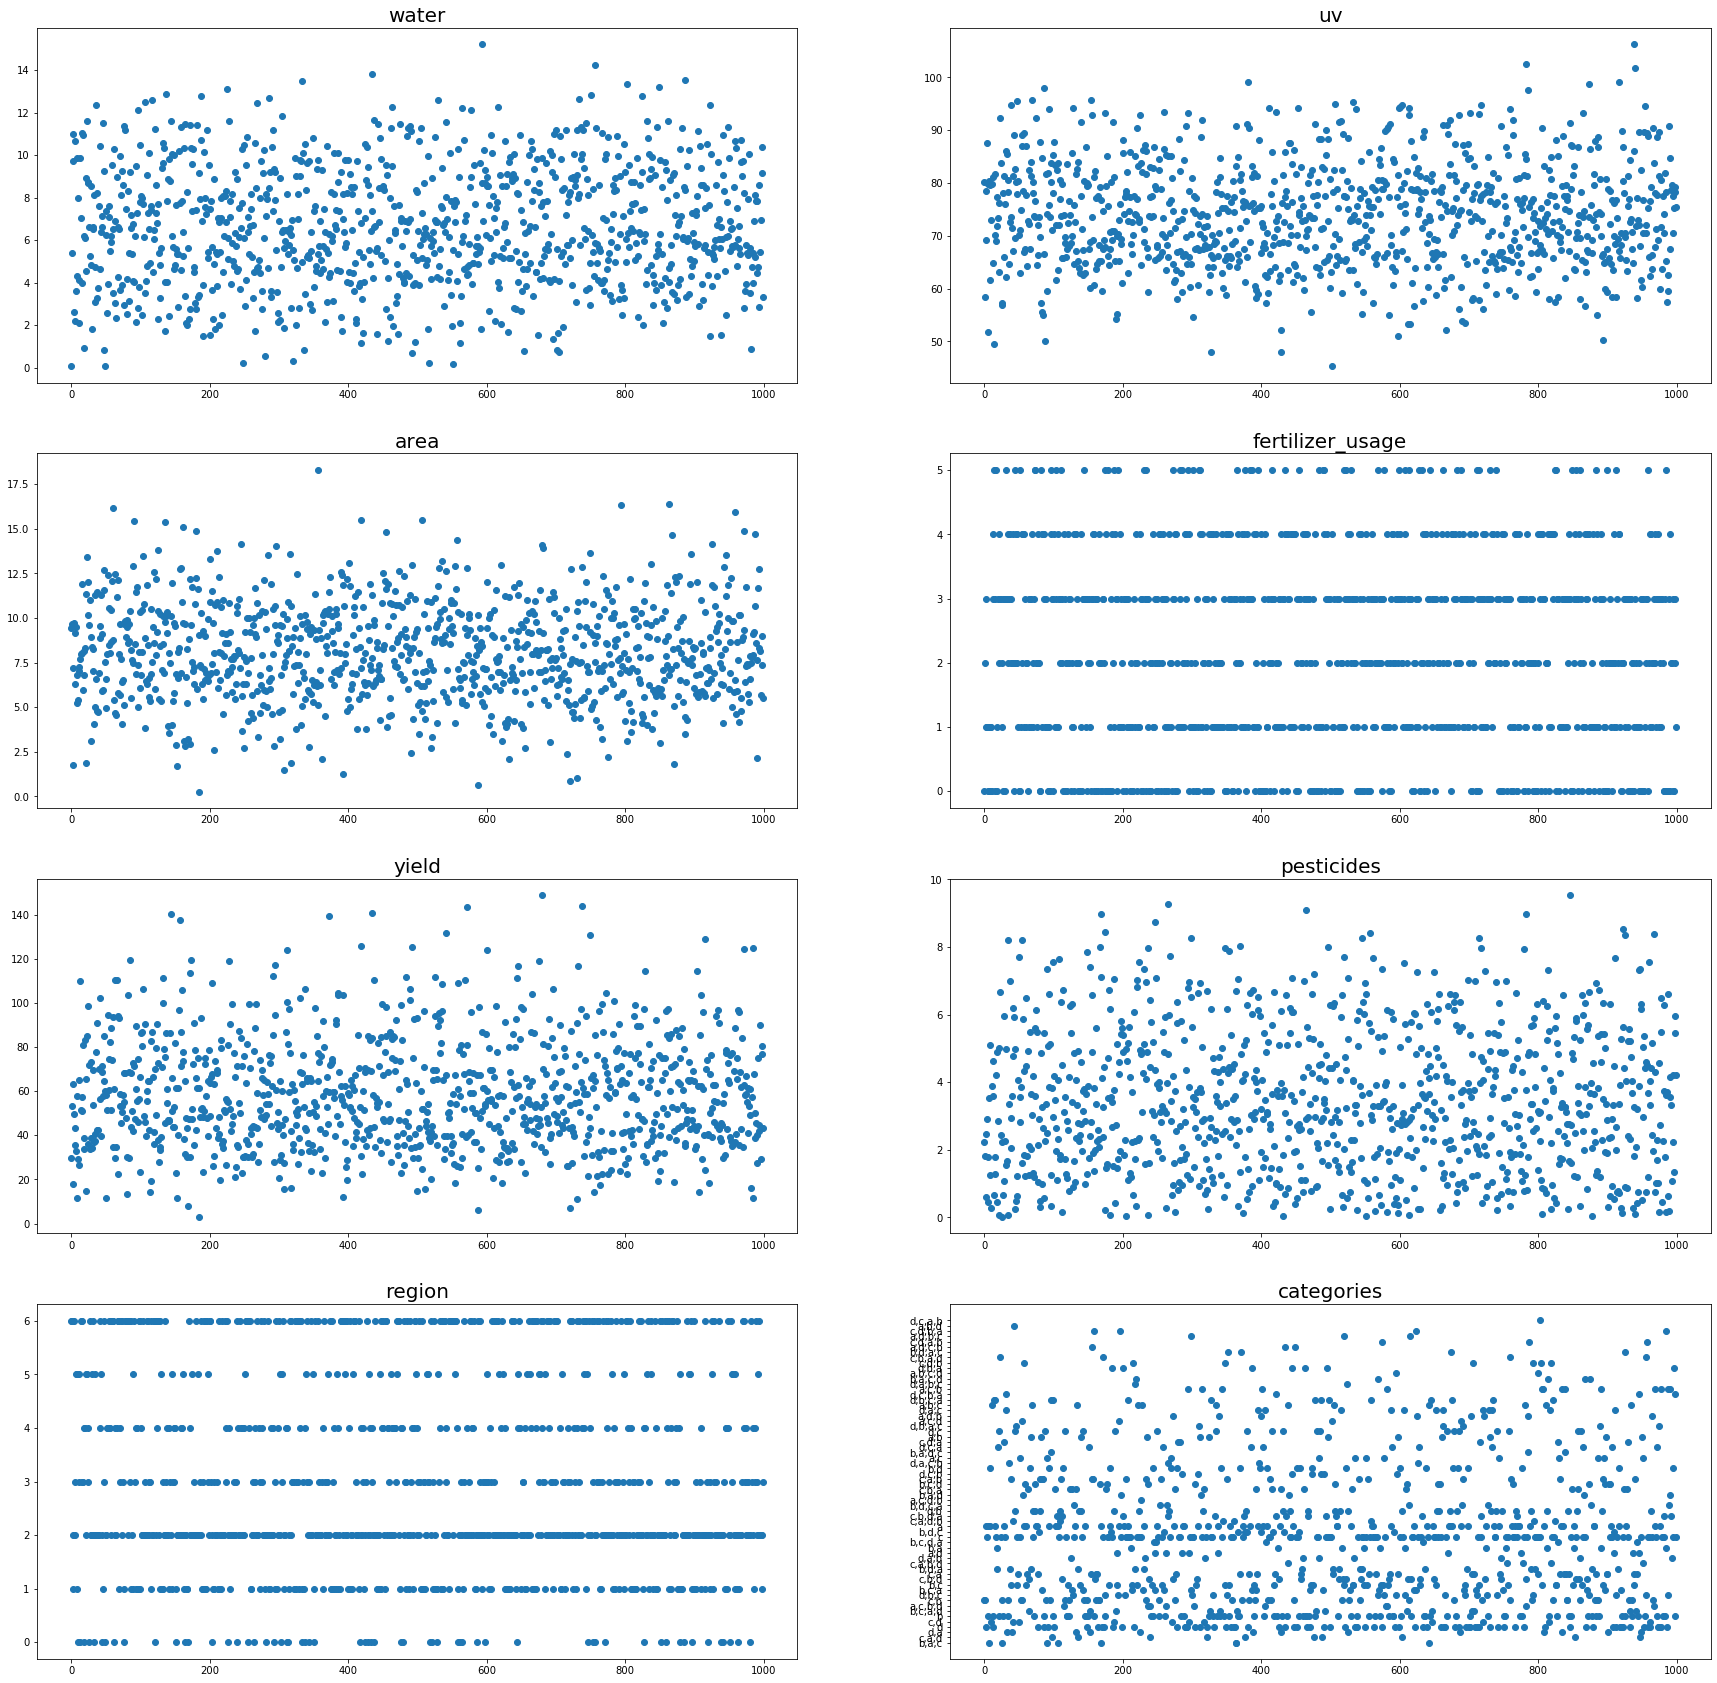

In [0]:
exploratory_analysis = EDA(data)
exploratory_analysis.scatter_plot("id")

C:\Users\birendra\Miniconda3\lib\site-packages\sklearn\impute\_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


<Figure size 2160x2160 with 0 Axes>

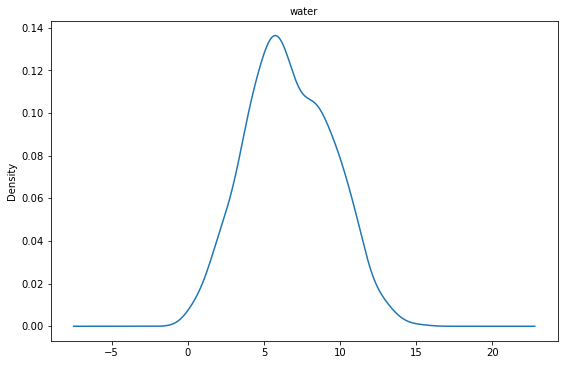

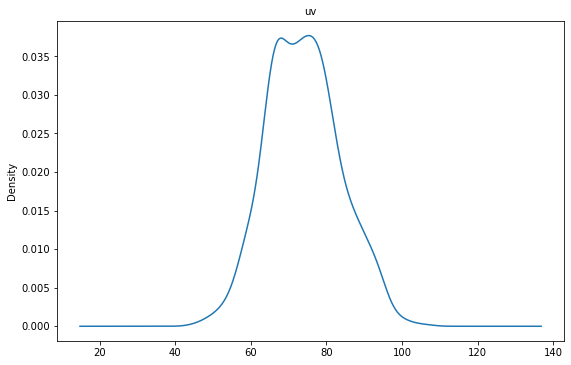

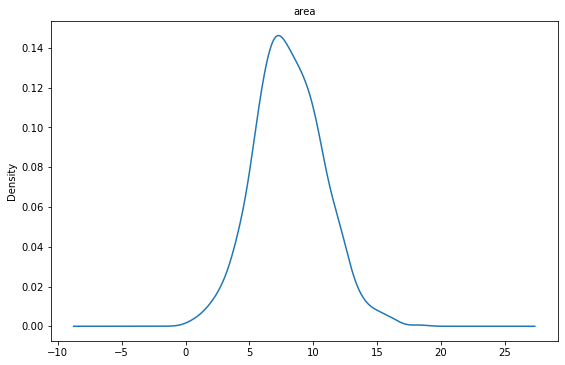

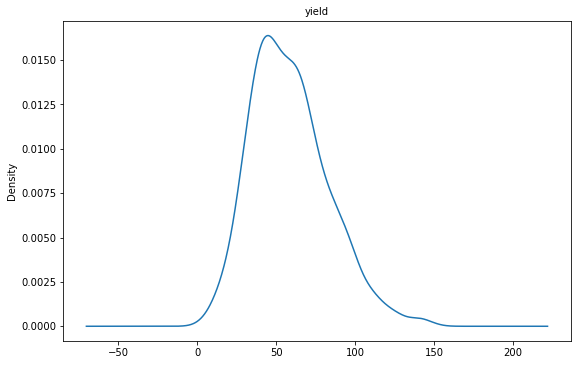

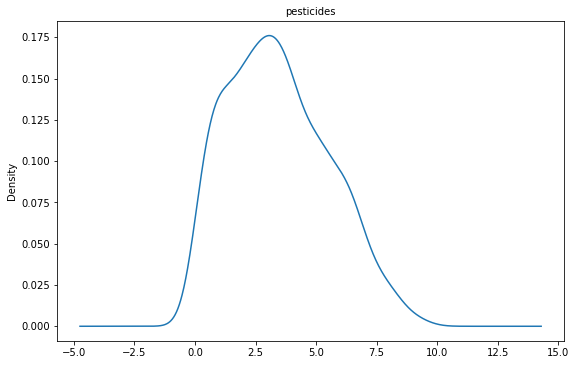

In [0]:
data[['water', 'uv', 'area', 'yield', 'pesticides']] =imp.fit_transform(data[['water', 'uv', 'area', 'yield', 'pesticides']])
exploratory_analysis = EDA(data)
exploratory_analysis.density_plot()

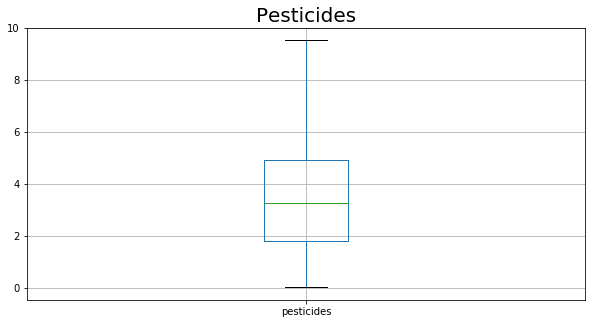

In [0]:
num_cols = ["pesticides"]
plt.figure(figsize=(10,5))
data[num_cols].boxplot()
plt.title("Pesticides", fontsize=20)
plt.show()

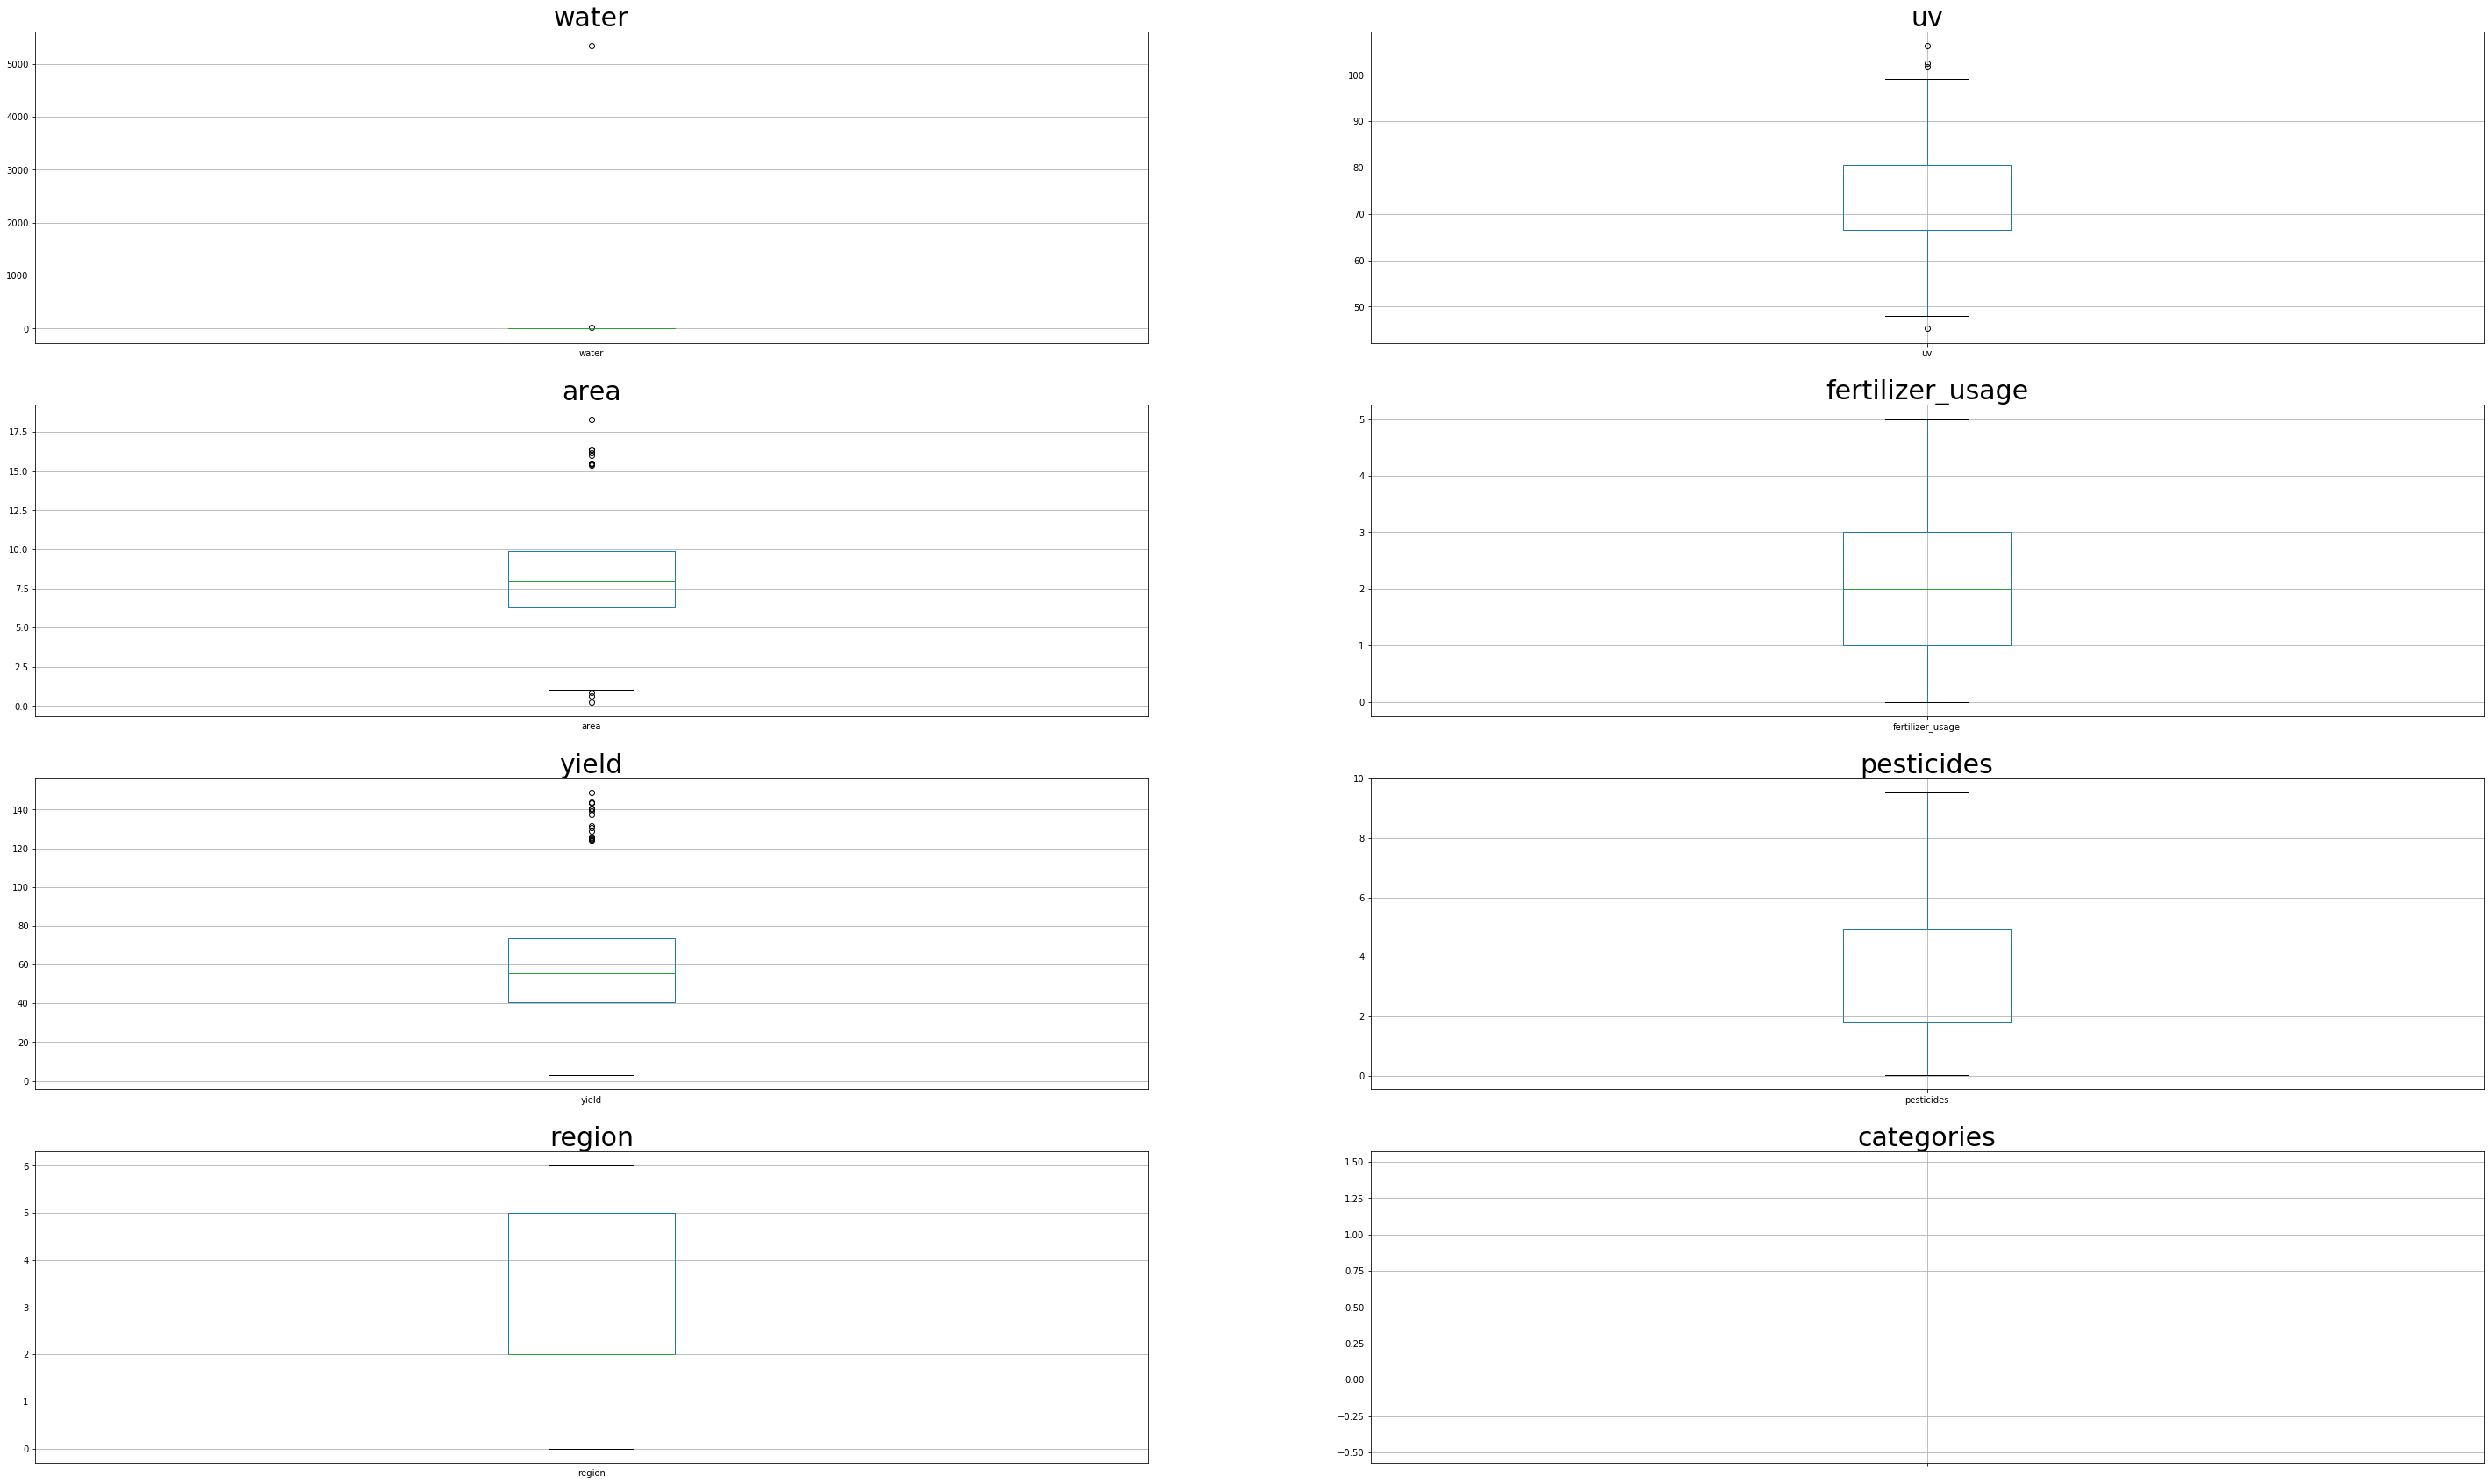

In [0]:
def box_plot(columns):
    plot_no =1
    plot_size = round(len(columns)//2+0.5)
    plt.figure(figsize=(50,30))
    for column in columns:
        plt.subplot(plot_size,2, plot_no)
        plt.title(column, fontsize=30)
        data[[column]].boxplot()
        plot_no = plot_no +1
        
box_plot(columns)

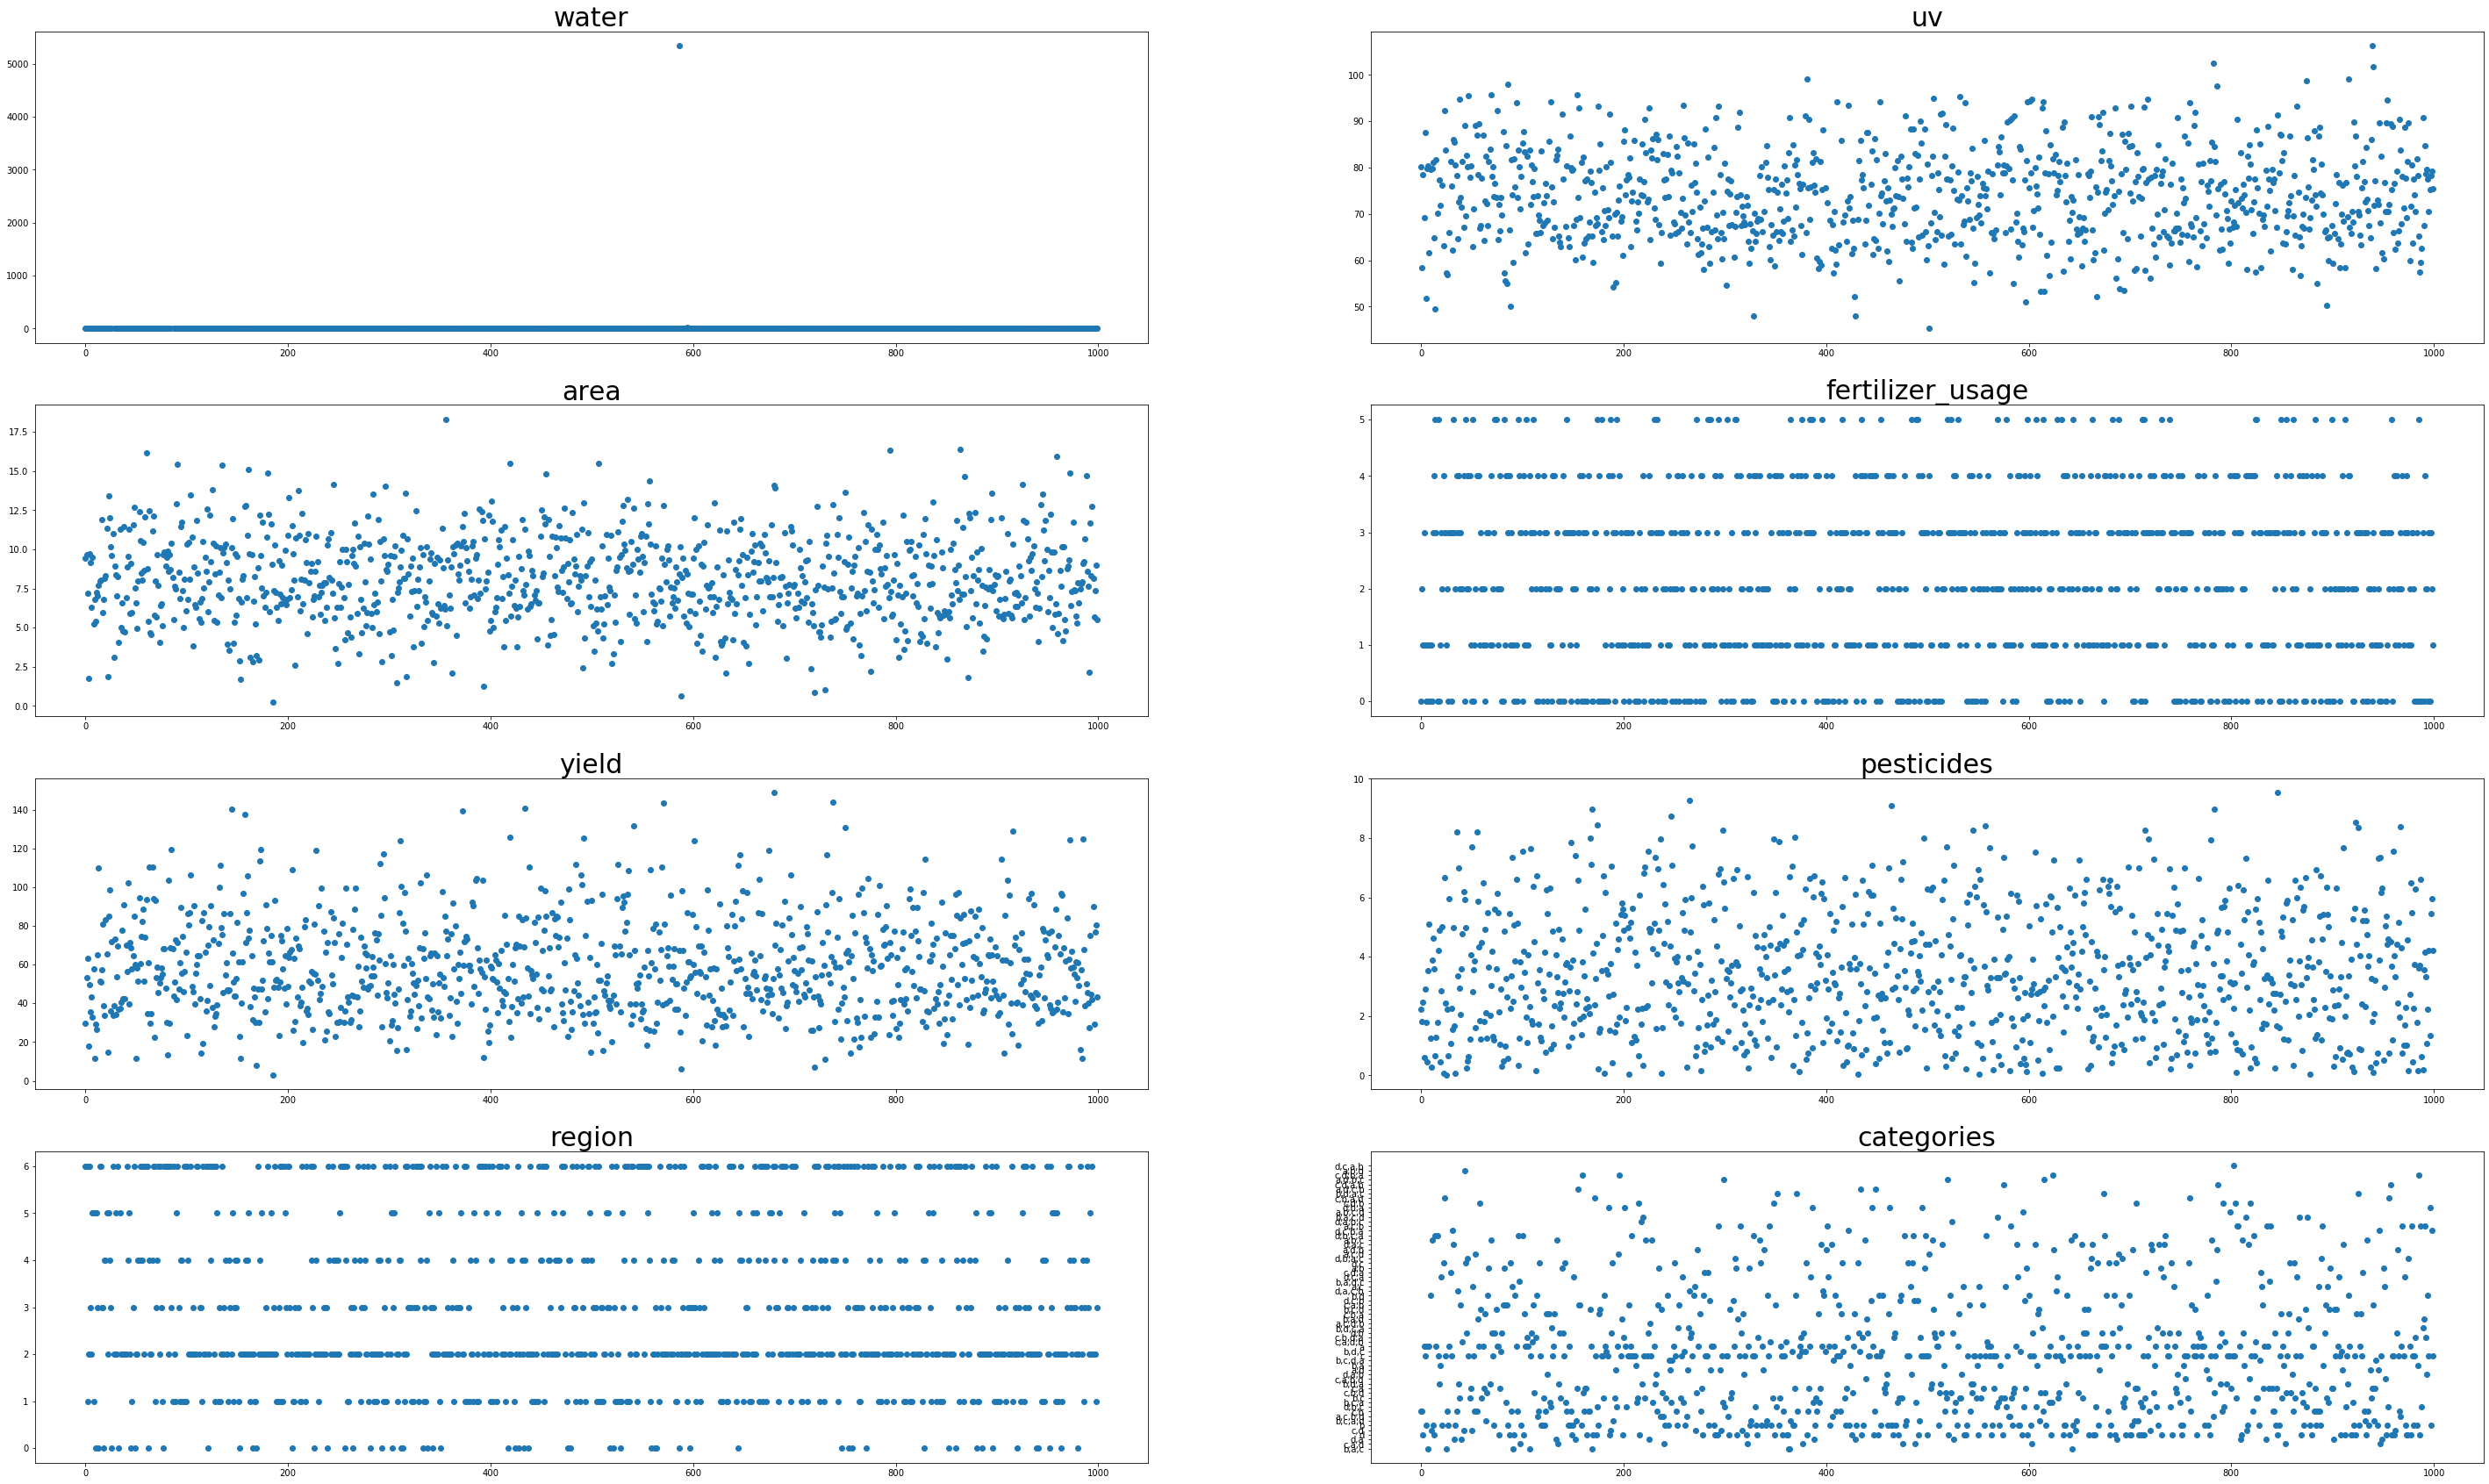

In [0]:
def scatter_plot(columns):
    plot_no =1
    plot_size = round(len(columns)//2+0.5)
    plt.figure(figsize=(50,30))
    for column in columns:
        plt.subplot(plot_size,2, plot_no)
        plt.title(column, fontsize=30)
        plt.scatter(data["id"], data[column])
        plot_no = plot_no +1

columns = ['water', 'uv', 'area', 'fertilizer_usage', 'yield', 'pesticides',
       'region', 'categories']
scatter_plot(columns)

In [0]:
corr = data[columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,water,uv,area,fertilizer_usage,yield,pesticides,region
water,1,0.0571646,0.000930505,0.00323448,0.0152538,-0.00833693,-0.0525416
uv,0.0571646,1,0.12136,-0.0430422,0.054515,0.00591222,-0.0479569
area,0.000930505,0.12136,1,-0.202512,0.49122,0.0363022,0.369481
fertilizer_usage,0.00323448,-0.0430422,-0.202512,1,0.452183,-0.0564621,0.0224058
yield,0.0152538,0.054515,0.49122,0.452183,1,0.0483797,-0.0450509
pesticides,-0.00833693,0.00591222,0.0363022,-0.0564621,0.0483797,1,-0.0108988
region,-0.0525416,-0.0479569,0.369481,0.0224058,-0.0450509,-0.0108988,1


In [0]:
def transform_pesticide_categories(row):
    pest_list = row["categories"].split(",")
    pest_list = sorted(pest_list)
    pest_string = "".join(pest_list)
    return pest_string

data["categories"] = data.apply(transform_pesticide_categories, axis =1)

In [0]:
data['categories'].unique()

array(['abc', 'acd', 'ad', 'd', 'cd', 'b', 'abcd', 'bc', 'bcd', 'ac',
       'abd', 'ab', 'c', 'a', 'bd'], dtype=object)

In [0]:
data.isnull().sum()

id                  0
water               0
uv                  0
area                0
fertilizer_usage    0
yield               0
pesticides          0
region              0
categories          0
yield_rate          0
categories_label    0
dtype: int64